# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [7]:
# Settings and prerequisites
# Import libraries (source : https://docs.python.org/3.4/library/index.html)
import sys
import pickle
import random
from datetime import datetime as dt

import numpy as np
from numpy import newaxis

import os, sys
import PIL
from PIL import Image

import scipy as sp
from scipy import ndimage
from scipy import misc

import time

import cv2
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import gridspec

import prettyplotlib as ppl
import brewer2mpl

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.contrib.layers import flatten
import urllib
import urllib.request

from shutil import copyfile

from sklearn.utils import shuffle

# Directories location 
pathData = 'C:/Users/mo/home/_eSDC_/_02_WIP/_DATA_/' # input('Enter the data path directory of the project data set')
pathImg  = pathData+'images/'
pathTb   = pathData+'tboard/'
pathPro  = pathData+'preprocessed/'
pathJit  = pathData+'jittered/'
pathAdon = pathJit +'_ADDON_/'
pathFull = pathJit +'_FULL_/'
pathV1   = pathData+'v1/'
pathLog  = 'C:/Users/mo/home/_eSDC_/_02_WIP/_170515-2125_Backup_/_Coding_/logs/nn_logs/'
pathCkp  = pathLog+'170704x0054_F3000RGB_R85e-5_D67/'

# Traces activation 
tRace1, tRace2, tRace3 = False, False, False
msg0 = '....WIP'+' '+dt.now().strftime("%y%m%dx%H%M")
msg1 = '.LOADED'+' '+dt.now().strftime("%y%m%dx%H%M")
msg2 = '...DONE'+' '+dt.now().strftime("%y%m%dx%H%M")
msg3 = '..ERROR'+' '+dt.now().strftime("%y%m%dx%H%M")
msg4 = '..DEBUG'+' '+dt.now().strftime("%y%m%dx%H%M")

# Helper functions: create directory tree
def foldCheck(path):
    '''Create a folder if not present'''
    if not os.path.exists(path):
        os.makedirs(path)

def foldCrea(path, dct):
    foldCheck(path)
    for i in dct['root']:
        foldCheck(path+i)
    for i in dct[ dct['root'][1] ]:
        foldCheck(path+dct['root'][1]+'/'+i)

# create directory tree
dic0 = {}
dic0 = { 'root'     : ['images', 'jittered', 'newData', 'preprocessed', 'tboard'],\
         'jittered' : ['_ADDON_', '_FULL_'] }
foldCrea(pathData,dic0)
        
        
%matplotlib inline

if tRace1: print(msg2,' | [{}] {}'.format('step0','settings and prerequisites'))

In [8]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
path = pathData
training_file   = path+'train.p'
validation_file = path+'valid.p'
testing_file    = path+'test.p'

try:
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']
except:
    raise IOError('the project data set should have been imported into the pathData directory before running this cell')

if tRace1: print(msg1,' | [{:5}] {}'.format('step0','Load train, valid, test data'))

In [3]:
s_train, c_train = train['sizes'], train['coords']
s_valid, c_valid = valid['sizes'], valid['coords']
s_test , c_test  = test['sizes'] , test['coords']

if tRace1: print(msg1,' | [{:5}] {}'.format('step0','Load their related sizes and coordinates'))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1.1. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validing examples =", n_valid)
print("Number of testing examples  =", n_test)
print("Image data shape  =", image_shape)
print("Number of classes =", n_classes)

if tRace1: print()
if tRace1: print(msg2,' | [{:5}] {}'.format('step1','provide a basic summary of the Data Set'))

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples  = 12630
Image data shape  = (32, 32, 3)
Number of classes = 43

...DONE 171009x1539  | [step1] provide a basic summary of the Data Set


### 1.2. Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

> #### 1.2.0. Helper functions

In [12]:
# Helper functions: Map class id, occurence, Traffic-sign names
def ocrLabel(dataLabel, tRace=False, csvFile='signnames.csv'):
    n_classes = len(np.unique(dataLabel))

    # Map class_id with Traffic-sign names. Output : dct[classId] = Traffic-sign names
    with open(csvFile, newline='', encoding="utf8") as csvFile1:
        read0 = csv.reader(csvFile1)
        dct0, dct1 = {}, {}
        for i in read0:
            try:
                dct0[int(i[0])] = i[1]
            except:
                pass

    # Occurence by class id. Output : dct[classId] = occurence
    ocr, classId = np.histogram(dataLabel, np.arange(n_classes+1))
    classId = classId[:-1].copy()
    for i,j in zip(classId,ocr):
            dct1[i] = j

    # Occurence by Traffic-sign names. Output : lt[classId] = [occurence, Traffic-sign names] 
    lt = []
    for i in classId:
            lt.append([dct1[i], dct0[i]])

    return dct0, dct1, lt

if tRace1: print(msg1,' | [{:5}] {:12} : {}'.format('step1','def ocrLabel','mapping of id/Class, occu., T-Sign names'))

In [13]:
# Helper functions: dict[class id] = 1D array of all related indexes
def indexClass(dataLabel, tRace=False):
    '''Output: a dictionary that has 43 keys (= class id)
               and its values are an 1D array containing all the indexes of a each class
    '''
    n_classes = len(np.unique(dataLabel))
    dct = {}
    tl  = ()

    for i in range(n_classes):
        tl     = np.where(dataLabel == i) # tuple = array of Index(class)
        dct[i] = tl[0]                  # dictionary[key=idClass] = array of Index(idClass)

    return dct
    
if tRace1: print(msg1,' | [{:5}] {:12} : {}'.format('step1','def indexClass','dict[classId] = 1D array''(''indexes'')'' '))

In [6]:
# Helper functions: showChart, showDistribution, showList
class dataExplo(object):
    def __init__(self, dataLabel, csvFile='signnames.csv', path=pathImg, sOrted=False):
        assert dataLabel.ndim == 1, 'Please, consider use the 1D array containing the label/class id of the traffic sign'
        self.dataLabel = dataLabel
        self.csvFile   = csvFile
        self.sOrted    = sOrted
        self.pathImg   = path
    

    def showChart(self,figNb=2):
        '''Show the number of occurence per class'''
        n_classes = len(np.unique(self.dataLabel))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors # [2] Get "Set2" colors from ColorBrewer
        hist, bins = np.histogram(self.dataLabel, np.arange(n_classes+1))
        fig = plt.figure(figsize=(16, 3))

        plt.title('fig.'+str(figNb)+': labels - number of occurence per class')
        plt.xlabel('Class id')
        plt.ylabel('Number of occurence')
        plt.xlim(0,n_classes)
        plt.ylim(0,np.amax(hist))
        ax = fig.add_subplot(111)
        ppl.bar(ax, bins[:-1], hist, grid='y', color='#616161')
        
        # Save the result into file:
        fig.savefig(self.pathImg+'_dataExplo_2_showChart.png')
     

    def showDist(self,figNb=3):
        n_classes = len(np.unique(self.dataLabel))
        set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
        axX = np.arange(len(self.dataLabel))
        axY = self.dataLabel
        fig = plt.figure(figsize=(16,2))

        plt.title('fig.'+str(figNb)+': labels - data distribution')
        plt.xlabel('Index')
        plt.ylabel('Class id')
        plt.ylim(0,n_classes)
        ax = fig.add_subplot(111)    
        plt.plot(axX,axY,".", color=set2[7]) #ax.scatter(axX, axY, color=set2[7])
        # Save the result into file:
        fig.savefig(self.pathImg+'_dataExplo_3_showDist.png')
          

    def showList(self,figNb=1): # _dataExplo_1_showList.png
        dt1 = { 0: '----------------------------------------------',\
                1: '{:47}',\
                2: '{:47}',\
                3: '{:40}',\
                4: '|{:4}'\
                }

        dt2 = {10: 'Traffic sign name',\
               11: 'Qty',\
               }


        if self.sOrted:
            sTr = 'sorted'
        else:
            sTr = ''
        print('fig.'+str(figNb)+': labels - {} List of occurence per Traffic sign name'.format(sTr))
        
        # Print the table header
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))
        print(dt1[3].format(dt2[10]), dt1[4].format(dt2[11])\
              +'  '+dt1[3].format(dt2[10]), dt1[4].format(dt2[11]))
        print(dt1[1].format(dt1[0]), dt1[1].format(dt1[0]))

        # Print ( the Traffic sign name and the related occurence ) x 2 / line
        dct0, dct1, lt = {}, {}, []
        dct0, dct1, lt0 = ocrLabel(self.dataLabel)
        
        if self.sOrted:
            lt = sorted(lt0, reverse=True)
        else:
            lt = lt0

        nbLine = int(len(lt)/2)
        rem    = len(lt)%2
        for i in range(nbLine):
            print(dt1[3].format(lt[i][1][:40]), dt1[4].format(lt[i][0])\
                  +'  '+dt1[3].format(lt[i+nbLine][1][:40]), dt1[4].format(lt[i+nbLine][0]))
        if rem !=0:
            print(dt1[3].format(''), dt1[4].format('')\
                  +'  '+dt1[3].format(lt[-1][1][:40]), dt1[4].format(lt[-1][0]))


    def __str__(self): # footnote [3]
        import inspect
        frame = inspect.currentframe()
        var_id = id(self.dataLabel)
        for name in frame.f_back.f_locals.keys():
            try:
                if id(eval(name)) == var_id:
                    return '< dataExplo''('' ' + name + ' '')'' >'                    
            except:
                return '< dataEplo''('' ? '')'' >'


if tRace1: print(msg1,' | [{:5}] {:12} : {}'.format('step1','class dataExplo','showChart, showDist.ribution, showList'))

In [7]:
# Helper functions: show43TS, show5TS, show5TS2, showMosaic, makeSprite, showSprite
class dataVisu(object):
    def __init__(self, dataImg, dataLabel, imgSize, bBox, path, cmap=None, imgFileFormat='png', tab=[5,10], pathImg=pathImg):
        self.dataImg   = dataImg
        self.dataLabel = dataLabel
        self.path      = path
        self.pathImg   = pathImg
        self.cmap      = cmap
        self.png       = imgFileFormat
        self.pathNmeImg= None
        self.sprImg    = None
        self.tab       = tab
        self.s         = imgSize
        self.c         = bBox
        

    def setImg(self, newImg):
        self.dataImg   = newImg    
        
    def getTab(self):
        return self.tab
        
    def setTab(self, newTab):
        self.tab=newTab
        assert len(self.tab) == 2, '[Error] your tab should be: Tab = [nbr of row, nbr col]'        
            
                
    def show43TS(self, figNb=4):
        '''Output: Show 43 random images, one per class, with the bounding box around the sign in the image
        '''
        # Parameters
        n_classes = len(np.unique(self.dataLabel))
        xDim, yDim = self.tab[0],self.tab[1]
        sIze = self.dataImg.shape[1]

        # Get dictionary[idClass] = tuple( index(idClass))
        dct, dct0, dct1, lt = {}, {}, {}, []
        dct0, dct1, lt = ocrLabel(self.dataLabel)
        dct = indexClass(self.dataLabel)

        # ...
        fig0, ax0 = plt.subplots(xDim, yDim, figsize=(15,6))
        fig0.subplots_adjust(hspace=0.2, wspace=0.1) #hspace=0.2, wspace=0.1) # hspace=0.05, wspace=0.05
        ax0 = ax0.ravel()

        # Print title
        tiTle = '43 random images, one per class'
        print()
        print('fig.'+str(figNb)+': '+tiTle)

        # Show 43 traffic sign, one image per class
        count = 0
        for i in range(xDim*yDim):
            rx    = sIze/self.s[i][0]
            ry    = sIze/self.s[i][1]
            if count < n_classes:
                index = random.randint(dct[count][0], dct[count][-1]) 
                image = self.dataImg[index]
                
                bbox  = patches.Rectangle((self.c[i][0]*rx, self.c[i][1]*ry),\
                                          (self.c[i][2]-self.c[i][0])*rx,\
                                          (self.c[i][3]-self.c[i][1])*ry,\
                                          edgecolor='#ffffcc',facecolor='none')  # #0000FF
                ax0[i].add_patch(bbox)
                
                if image.shape[-1]==1:
                    ax0[i].imshow(image, cmap = 'gray')
                elif image.shape[-1]==3:
                    ax0[i].imshow(image)           
                ax0[i].axis('off')
                tl0 = lt[count][1][:17]+'.'
                ax0[i].set_title(tl0, fontsize=8)
            else:
                ax0[i].axis('off')
            count += 1
        fig0.savefig(self.pathImg+'_dataVisu_4_show43TS.png')
            


    def show5TS(self, figNb=5):
        # Parameters
        n_classes = len(np.unique(self.dataLabel))
        xDim, yDim = self.tab[0],self.tab[1]

        # Get dictionary[idClass] = tuple( index(idClass))
        dct, dct0, dct1, lt = {}, {}, {}, []
        dct0, dct1, lt = ocrLabel(self.dataLabel)
        dct = indexClass(self.dataLabel)

        # ...
        fig0, ax0 = plt.subplots(xDim, yDim, figsize=(15,6))
        fig0.subplots_adjust(hspace=0.2, wspace=0.1) #hspace=0.2, wspace=0.1) # hspace=0.05, wspace=0.05
        ax0 = ax0.ravel()

        # Print title
        tiTle = 'several images of the same traffic signs'
        print()
        print('fig.'+str(figNb)+': '+tiTle)

        # Show 43 traffic sign, one image per class
        count = random.randint(0, n_classes-1)
        itr   = 0
        for j in range(xDim):
            for i in range(yDim):
                dctLen = len(dct[count])
                indEx  = random.randint(0,dctLen-1)
                index  = dct[count][indEx]
                image = self.dataImg[index]
                ax0[itr].imshow(image, cmap=self.cmap)
                ax0[itr].axis('off')
                title = lt[count][1][:17]+'.'
                ax0[itr].set_title(title, fontsize=8)
                itr += 1
            tmp = count
            while tmp == count:
                count = random.randint(0, n_classes-1)
        fig0.savefig(self.pathImg+'_dataVisu_5_show5TS.png')
        
        
                
    def show5TS2(self, figNb=5):
        # Parameters
        n_classes = len(np.unique(self.dataLabel))
        xDim, yDim = self.tab[0],self.tab[1] # tab[5, 10] <- default values
        sIze = self.dataImg.shape[1]         # <-- show43TS

        # Get dictionary[idClass] = tuple( index(idClass))
        dct, dct0, dct1, lt, lt0 = {}, {}, {}, [], []
        dct0, dct1, lt = ocrLabel(self.dataLabel)
        dct = indexClass(self.dataLabel)
        lt0 =['dataPPro.proGray', 'dataPPro.proShp', 'dataPPro.proHst', 'dataPPro.proClahe', 'dataPPro.proCtrNrm']

        # ...
        fig0, ax0 = plt.subplots(xDim, yDim, figsize=(15,6))
        fig0.subplots_adjust(hspace=0.2, wspace=0.1) #hspace=0.2, wspace=0.1) # hspace=0.05, wspace=0.05
        ax0 = ax0.ravel()

        # Print title
        count = random.randint(0, n_classes-1) #title = lt[count][1][:17]+'.'
        tiTle = 'same traffic signs after being preprocceed | TS name = '+lt[count][1]+'.'
        print()
        print('fig.'+str(figNb)+': '+tiTle)

        # Show traffic sign: 5 lines, Z columns
        count = random.randint(0, n_classes-1)
        itr   = 0
        for j in range(xDim): # xDim = 5
            for i in range(yDim): # yDim = 10
                dctLen = len(dct[count])
                indEx  = random.randint(0,dctLen-1)
                index  = dct[count][indEx]
                image = self.dataImg[index]
                ax0[itr].imshow(image, cmap=self.cmap)
                ax0[itr].axis('off')
                title =  lt0[itr%yDim] #title = lt[count][1][:17]+'.'
                ax0[itr].set_title(title, fontsize=8)
                itr += 1
            tmp = count
            while tmp == count:
                count = random.randint(0, n_classes-1) 
        fig0.savefig(self.pathImg+'_dataVisu_5_show5TS2.png')
            
            
    def showMosaic(self, figNb=6):
        # Number of classes/labels there are in the dataset
        n_classes = len(np.unique(self.dataLabel))

        # Print title
        tiTle = 'mosaic consists of 43 x 5 images, one patern per class'
        print()
        print('fig.'+str(figNb)+': '+tiTle)
        
        # Get dictionary[idClass] = tuple( index(idClass))
        dct, dct0, dct1, lt = {}, {}, {}, []
        dct0, dct1, lt = ocrLabel(self.dataLabel)
        dct = indexClass(self.dataLabel)
        
        # Compute the width and the height of the sprite image
        dIm = n_classes**0.5
        dIm = int(dIm) + (dIm - int(dIm) > 0)
        master_width, master_height = dIm*3, dIm*3
        gs1 = gridspec.GridSpec(master_width, master_height)
        gs1.update(left=0, right=0.5, hspace=0.2, wspace=0.1) #hspace=0.2, wspace=0.1) # hspace=0.05, wspace=0.05# hspace=0.05, wspace=0.05)
               
        # Create and save the sprite image
        count = 0
        for y0 in range(dIm):
            y = y0*3
            for x0 in range(dIm):
                x = x0*3
                lt1 = [ [0+x,y+0], [0+x,y+2], [1+x,y+2], [2+x,y+2], [2+x,y+1], [2+x,y+0] ]
                flag = True
                
                if count+1 <= n_classes:
                    for i in lt1:
                        if flag:
                            ax = plt.subplot(gs1[0+x:x+2,0+y:y+2])            
                            flag = False
                        else:
                            ax = plt.subplot(gs1[i[0],i[1]])
                        index = random.randint(dct[count][0], dct[count][-1]) 
                        image = self.dataImg[index]
                        ax.imshow(image, cmap=self.cmap)
                        ax.set_xticks([]); ax.set_yticks([])
                else:
                    ax = plt.subplot(gs1[x,y])
                    ax.set_xticks([]); ax.set_yticks([])
                    ax.axis('off')            
                    
                count += 1
        #fig0.savefig(self.pathImg+'_dataVisu_6_showMosaic.png')
            
    
    def makeSprite(self, cMap='gray', fileName='xx', tRace1=False, tRace2=False):
        '''Input : cMap = 'rgb' or  'gray'
           Output: a single image, called a sprite image, that is a collection of all images contained in the dataImg
           Note  : it will be useful when we implement the Embedding Visualizer in TensorBoard (tensorflow)
        '''
        if tRace2: print('[{}] {} : INPUT | dataImg.shape = {}'.format('dataVisu','makeSprite',self.dataImg.shape))
        ## Create a blank sprite image
        #-1/ Import libraries
        #import PIL
        #from PIL import Image

        # 0/ Retrieve the name of self.dataImg
        outputName = '_sp_'+fileName
        lt=[]
        if tRace2:print('[{}] {} : {} = {}'.format('dataVisu','makeSprite', 'Retrieve the name of self.dataImg',outputName ))

        #1-Retrieve the width and the height of image input
        image_width, image_height = self.dataImg.shape[1], self.dataImg.shape[2]

        #2-Compute the width and the height of the sprite image
        dIm = len(self.dataImg)**0.5
        dIm = int(dIm) + (dIm - int(dIm) > 0)
        pxSprite = dIm*image_width
        self.sprImg_width, self.sprImg_height = pxSprite, pxSprite
        if tRace2: print('[{}] {} : sprImg_width = {}, sprImg_height = {}'.format('dataVisu','makeSprite',self.sprImg_width,self.sprImg_height))


        outputName = outputName+'_{}x{}'.format(self.sprImg_width, self.sprImg_height)
        if tRace2: print('[{}] {} : sprite image name = {}.{}'.format('dataVisu','makeSprite',outputName,self.png))

        #3-Create a blank sprite image
        self.sprImg = Image.new(mode='RGBA', size=(self.sprImg_width, self.sprImg_height), color=None)
        if tRace2: print('[{}] {} : The blank sprite image is {}x{}'.format('dataVisu','makeSprite',self.sprImg_width, self.sprImg_height))

        ## Create and save the sprite image
        count = 0
        for y in range(dIm):
            for x in range(dIm):
                try:
                    if cMap == 'rgb' : image  = Image.fromarray(self.dataImg[count],'RGB')
                    if cMap == 'gray': image  = Image.fromarray(self.dataImg[count],'L')
                    lt.append(self.dataLabel[count])
                except:
                    if cMap == 'rgb' : image  = Image.new(mode='RGB', size=(self.sprImg_width, self.sprImg_height), color=0)
                    if cMap == 'gray': image  = Image.new(mode='L'  , size=(self.sprImg_width, self.sprImg_height), color=None)
                    lt.append(99)
                finally:                
                    if tRace1: print('[{}] {} : adding image {}'.format('dataVisu','makeSprite',count+1),' at location {}'.format((x,y)))
                    if tRace2 and ((count+1)%int(dIm*dIm/10)==0): print('[{}] {} : adding image {}'.format('dataVisu','makeSprite',count+1),' at location {}'.format((x,y)))
                    
                    self.sprImg.paste(image,(x*image_width,y*image_height))
                    image.close()
                    count+= 1

        self.pathNmeImg = self.path+outputName+'.'+self.png
        self.sprImg.save(self.pathNmeImg) #, transparency=0 )
        if tRace2: print('[{}] {} : {}.{} has been created and saved'.format('dataVisu','makeSprite',outputName, self.png))

        spriteLbl = self.path+outputName+'.tsv'
        np.savetxt(spriteLbl, lt, '%1i')
        if tRace2: print('[{}] {} : {}.{} has been created and saved'.format('dataVisu','makeSprite',outputName, '.tsv'))

        return self.pathNmeImg, self.sprImg
    
    
    def showSprite(self, figNb=7):
        '''It shows the sprite image into the jupyter notebook
        '''
        from matplotlib.pyplot import imshow
        import numpy as np
        from PIL import Image

        # Print title
        tiTle = 'a single image of all images contained in the data set'
        print()
        print('fig.'+str(figNb)+': '+tiTle)
        
        %matplotlib inline
        try:
            imshow(np.asarray(self.sprImg))
        except:
            imshow(self.sprImg)
        imshow(self.sprImg)
                        
                        
    def __str__(self): # footnote [3]
        return '< dataVisu >'       
                
                
if tRace1: print(msg1,' | [{:5}] {:12} : {}'.format('step1','class dataVisu','show43TS, show5TS, show5TS2, showMosaic, makeSprite, showSprite'))

In [13]:
# Helper functions: Show xSize*ySize images
def showTrace(dataImg,title='',xSize=1, ySize=8):
    fig0, ax0 = plt.subplots(xSize, ySize, figsize=(15,6))
    fig0.subplots_adjust(hspace=0.2, wspace=0.1)
    ax0 = ax0.ravel()

    for i in range(xSize*ySize): 
        image = dataImg[i].squeeze()
        #print('[INPUT]image.shape: {}'.format(image.shape))
        
        ch = len(image.shape)
        #print('[INPUT]ch = len dataImg.shape: {}'.format(ch))
        
        if image.shape[-1] == 3:        
            cMap='rgb'
            ax0[i].imshow(image)
        elif image.shape[-1] == 32 or image.shape[-1] == 1:
            cMap='gray'
            ax0[i].imshow(image, cmap = cMap)
        else:
            raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))

        #ax0[i].imshow(image, cmap = cMap)
        ax0[i].set_title(title, fontsize=8)
        ax0[i].axis('off')
        
if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step1','showTrace','show xSize x ySize images'))

> #### 1.2.1. Explore the data set

fig.1: labels -  List of occurence per Traffic sign name
----------------------------------------------  ---------------------------------------------- 
Traffic sign name                        |Qty   Traffic sign name                        |Qty 
----------------------------------------------  ---------------------------------------------- 
Speed limit (20km/h)                     | 180  Double curve                             | 270
Speed limit (30km/h)                     |1980  Bumpy road                               | 330
Speed limit (50km/h)                     |2010  Slippery road                            | 450
Speed limit (60km/h)                     |1260  Road narrows on the right                | 240
Speed limit (70km/h)                     |1770  Road work                                |1350
Speed limit (80km/h)                     |1650  Traffic signals                          | 540
End of speed limit (80km/h)              | 360  Pedestrians                           

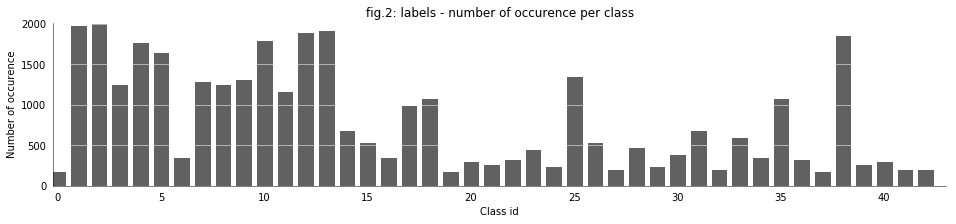

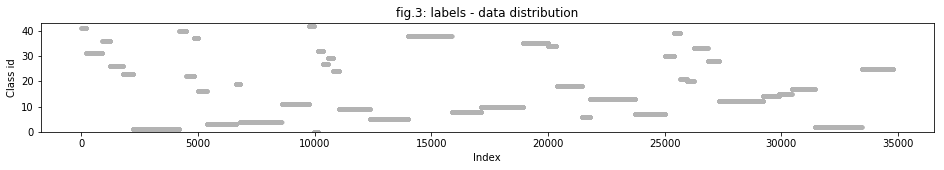

In [11]:
# Initiate the data set exploration
import csv
exploLabel = dataExplo(y_train)

# List each traffic sign and its related amount of occurence
exploLabel.showList(1)

# Plot the histogram chart of the data set
import prettyplotlib as ppl
import brewer2mpl
import matplotlib.pyplot as plt
exploLabel.showChart(2)

# Plot the distribution chart of the data set
exploLabel.showDist(3)

> #### 1.2.2. Visualize the data set


fig.4: 43 random images, one per class


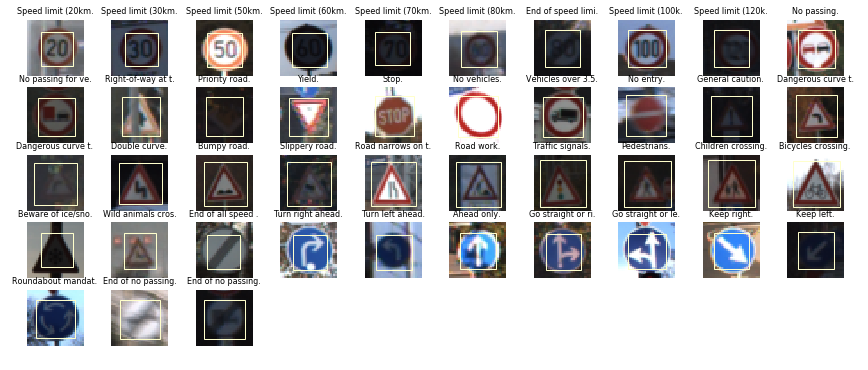

In [12]:
# Initiate the data set visualization
path = pathTb
visuTrain = dataVisu(X_train, y_train, s_train, c_train, path)

# Show 43 random images, one per class, with the bounding box around the sign in the image
import random
import matplotlib.patches as patches
visuTrain.show43TS()


fig.5: several images of the same traffic signs


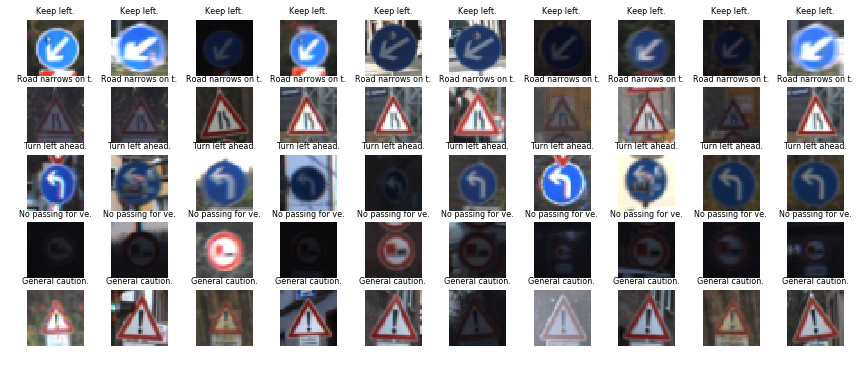

In [13]:
# Show 10 samples of 5 traffic signs
visuTrain.show5TS()


fig.6: mosaic consists of 43 x 5 images, one patern per class


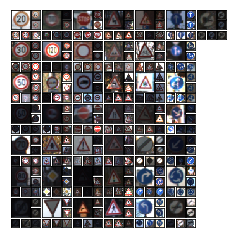

In [14]:
from matplotlib import gridspec
visuTrain.showMosaic()

In [15]:
import PIL
from PIL import Image
t1,t2= visuTrain.makeSprite('rgb')

In [ ]:
from IPython.display import Image
img  = '_sp_xx_5984x5984.png' # '_spX_train_5984x5984.png'
print('fig.7: a single image of all images contained in the data set')
Image(pathTb+img,width=300, height=200)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1. Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

> #### 2.1.0. Helper functions

In [23]:
# Helper functions ------------------------------------------------------------
class hFct(object):
    '''Helper functions'''
    def __init__(self,path,name,pyObj):
        self.path  = path
        self.name  = name
        self.pyObj = pyObj

    # Save python objects -----------------------------------------------------
    def serialize(self):
        """Pickle a Python object"""      
        with open(self.path+self.name, "wb") as pfile:
            pickle.dump(self.pyObj, pfile)

    # Load python objects -----------------------------------------------------
    def deserialize(self):
        """Extracts a pickled Python object and returns it"""
        with open(self.path+self.name, "rb") as pfile:
            dataSet = pickle.load(pfile)
        return dataSet

    # Load pickled data -------------------------------------------------------
    def loadValid(self):       
        dataSet   = self.deserialize()
        dataImg   = dataSet['features']
        dataLabel = dataSet['labels']
        try:
            dataSize  = dataSet['sizes']
            dataCoord = dataSet['coords']     
        except:
            dataSize  = {}
            dataCoord = {}
        finally:
            return dataImg, dataLabel, dataSize, dataCoord           
            
if tRace1: print(msg1,' | [{}] {:14} : {}, {}, {}'.format('step0','helper fct','serialize','deserialize','loadValid'))

.LOADED 171019x1242  | [step0] helper fct     : serialize, deserialize, loadValid


In [10]:
class dataPPro(object):
    def __init__(self, dataImg, dataLabel, dataSize, dataCoord, path=''):
        self.dataImg   = dataImg
        self.dataLabel = dataLabel
        self.s         = dataSize
        self.c         = dataCoord
        self.path      = path

        
    def getImg(self):
        return self.dataImg
        
    def setImg(self, newImg):
        self.dataImg = newImg.copy()
        
    def getLabel(self):
        return self.dataImg
        
    def setLabel(self, newLabel):
        self.dataLabel = newLabel.copy()
        
      
    # Preprocess the data: RGB > grayscale
    def proGray(self):
        outImg = np.empty_like(self.dataImg)*0
        outImg = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in self.dataImg ])
        #outImg = outImg[..., newaxis]
        self.setImg(outImg)
        return outImg, self.dataLabel, self.s, self.c


    # Preprocess the data: input{RGB,GRAY} > sharpen
    def proShp(self):
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        outImg = np.array([cv2.filter2D(img, -1, kernel) for img in self.dataImg])
        #outImg = outImg[..., newaxis]
        self.setImg(outImg)
        return outImg, self.dataLabel, self.s, self.c
    
    
    # Preprocess the data: sharpen > equalized histogram
    def proHst(self):
        outImg = np.array([cv2.equalizeHist(img) for img in self.dataImg ])
        #outImg = outImg[..., newaxis]
        self.setImg(outImg)
        return outImg, self.dataLabel, self.s, self.c
    

    # Preprocess the data: equalized histogram > CLAHE
    def proClahe(self):
        '''CLAHE - Equalize (adaptively with limited contrast) the histogram of a globaly equalize image'''
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        outImg = np.array([clahe.apply(img) for img in self.dataImg ])
        #outImg = outImg[..., newaxis]
        self.setImg(outImg)
        return outImg, self.dataLabel, self.s, self.c

    
    # Preprocess the data: CLAHE > center & normalize images
    def proCtrNrm(self):
        '''Source: SDCNP, Lesson 8, lecture 23-Normalized Inputs and Initial Weights'''
        outImg = (self.dataImg - np.mean(self.dataImg))/np.std(self.dataImg) # zero-center&normalize
        return outImg, self.dataLabel, self.s, self.c
              
    
    def __str__(self):
        return '< dataPPro >'  
    

if tRace1: print(msg1,' | [{:5}] {} : {}'.format('step2','dataPPro','Preprocess the data'))

In [11]:
# Preprocess the data: preprocessed and save all images
def proAll(ltName =['train','valid','test'],\
           ltData =[(X_train, y_train), (X_valid, y_valid), (X_test, y_test)],\
           ltSzcr =[(s_train, c_train), (s_valid, c_valid), (s_test, c_test)],\
           path   = pathPro,\
           ltMeth =[dataPPro.proGray, dataPPro.proShp, dataPPro.proHst, dataPPro.proClahe],\
           ltSufx =['1Gray', '2Shp', '3Hst', '4Clahe']):
    
    dtPrOut = {}
    
    
    for i0, i1, i5 in zip(ltName, ltData, ltSzcr):
        dtPrIn = dataPPro(i1[0], i1[1], i5[0], i5[1])
        
        flag = None

        for i2, i3 in zip(ltMeth, ltSufx):
            if flag is None: # Center and normalize the RGB images
                dtPrOut['features'], dtPrOut['labels'], dtPrOut['sizes'], dtPrOut['coords'] = dataPPro.proCtrNrm(dtPrIn)
                hFct(path, i0+'_0Rgb.p', dtPrOut).serialize()   # serialize(dtPrOut, path, i0+'_0Rgb.p')
                if tRace1:print('[{}] {} > {}'.format('proAll','RGB','CTRNRM'))
                if tRace1:print('[{}] {} : dataImg[0][0][0] = {}'.format('proAll','RGB-CTRNRM',dtPrOut['features'][0][0][0]))
                dtPrOut = {}
                flag = False                    
                    
            dtPrOut['features'], dtPrOut['labels'], dtPrOut['sizes'], dtPrOut['coords'] = i2(dtPrIn)
            if tRace1:print('[{}] {} : shape = {}'.format('proAll',i3,dtPrOut['features'].shape))
            if tRace1:print('[{}] {} : {} : dataImg[0][0][0] = {}'.format('proAll',i3,1,dtPrOut['features'][0][0][0]))
            
            dtPrOut['features'], dtPrOut['labels'], dtPrOut['sizes'], dtPrOut['coords'] = dataPPro.proCtrNrm(dtPrIn)
            if tRace1:print('[{}] {} : {} : shape = {}'.format('proAll',i3,2,dtPrOut['features'].shape))
            if tRace1:print('[{}] {} : dataImg[0][0][0] = {}'.format('proAll',i3,dtPrOut['features'][0][0][0]))  
                
            
            if dtPrOut['features'].shape[-1] == 32:
                dtPrOut['features'] = dtPrOut['features'][..., newaxis]
                if tRace1:print('[{}] {} : {} : shape = {}'.format('proAll',i3,3,dtPrOut['features'].shape))
                
                
            hFct(path, i0+'_'+i3+'.p', dtPrOut).serialize()   # serialize(dtPrOut, path, i0+'_'+i3+'.p')
            dtPrOut = {}
            if tRace1:print('[{}] {} > {}'.format('proAll',i3,'CTRNRM'))            
            
        del dtPrIn

if tRace1: print(msg1,' | [{:5}] {} : {} / {}'.format('step2','dataPPro','Preprocess all the data','train, valid, test'))

In [12]:
def creaShow(pathIn=[pathData, pathPro], tRace=False, tRAce=False):
    cMap = ['rgb', 'gray']

    for path, cmap in zip(pathIn, cMap):
        for infile in os.listdir(path):
            if infile[-2:] == '.p' and '5CtrNrm' not in infile:          
                # Download python objects
                try:
                    dat0Img, dat0Label, dat0Size, dat0Coord = hFct(path, infile, '').loadValid()
                except:
                    dat0Img, dat0Label  = hFct(path, infile, '').loadValid()
                    dat0Size, dat0Coord = {}, {}
                finally:
                    if tRace:print('[{:8}] {} : dat0Img.shape = {}'.format('creaSpro','Download python objects', dat0Img.shape ))
                    if tRAce:name = input('Press < return > to continue')
                    if tRace:print('')

                # Show a few sample of the 
                if tRace:print('[{:8}] {} : print visuObj = {}'.format('creaShow','infile', infile ))
                showTrace(dat0Img,infile,xSize=1, ySize=8)
                if tRAce:name = input('Press < return > to continue')
                if tRace:print('') 
                    
if tRace1: print(msg2,' | [{:5}] {:8}: {}'.format('step2','creaShow','Show a few sample of the'))

In [13]:
# Perturbation in position
def jitShift(dataImg, pXl=2, tRace=False):
    '''Image is randomly perturbed in position ([-pXl,pXl] pixels)
       Output: the image is translated random values between -pXl and pXl
    ''' 
    xPxl, yPxl, count = 0, 0, 0
    outImg = np.empty_like(dataImg)*0    

    while xPxl==0 and yPxl==0:
        xPxl = random.randint(-pXl, pXl)
        yPxl = random.randint(-pXl, pXl)
        count += 1
        if count > 3:
            xPxl = yPxl = pXl
            break
    rows, cols = dataImg.shape[0], dataImg.shape[1]
    M = np.float32([[1,0,xPxl],[0,1,yPxl]])
    outImg = cv2.warpAffine(dataImg,M,(cols,rows))
     
    return outImg

if tRace1: print( msg1,' | [{:5}] {:10} : {}'.format( 'step2','jitShift''('''')''','randomly perturbed in position') )

In [14]:
# Perturbation in rotation
def jitRot(dataImg, theta1=7, theta2=15, tRace=False):
    '''Rotation of an image for an angle θ is achieved by the transformation matrix of the form
       Output: the images are rotated values between -theta and theta
    '''
    rot, rot1, rot2 = 0, 0, 0   
    outImg = np.empty_like(dataImg)*0    

    rot1 = np.random.uniform(-theta2, -theta1) #random.randint(-theta, theta)
    rot2 = np.random.uniform(theta1, theta2) 
    rot  = random.choice([rot1,rot2])
    
    rows, cols = dataImg.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1)
    outImg = cv2.warpAffine(dataImg,M,(cols,rows))

    return outImg

if tRace1: print( msg1,' | [{:5}] {:10} : {}'.format( 'step2','jitRot''('''')''','randomly perturbed in rotation') )

In [15]:
# Bounding box to crop the image
def jitCrop(dataImg, s, c, zoomIn=True, pad=2, tRace=tRace1, msg=msg0):
    '''Use the bounding box to crop the image, then resize it to get 32x32 images
    '''
    x = 5
    if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] Init < s:{} {}, c{} >'.format('step2','jitCrop', 0, x,s[0],s[1], c))
    
    try:
        a = s[0]/s[1]
        b = s[1]/s[0]
    except:
        raise ZeroDivisionError('s=',s)
    finally:
        if a>2 or b>2:
            if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] resize : dataImg.shape = {}'.format('step2','jitCrop', 5, x, dataImg.shape))
            return dataImg
            
        else:
            # create empty numpy array
            rows, cols = dataImg.shape[:2]
            if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] rows = {}, cols = {}'.format('step2','jitCrop', 1, x, rows, cols))   
            
            # use the bounding box to crop the image
            rx = rows/s[0]
            ry = cols/s[1]
            if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] rx = {:2.3}, ry = {:2.3}'.format('step2','jitCrop', 2, x, rx, ry))
            
            if zoomIn:
                nC = [ int(c[0]*rx + pad), int(c[1]*ry - pad), int(c[2]*rx + pad), int(c[3]*ry - pad) ]
                if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] {} = {}'.format('step2','jitCrop', 3, x, 'zoomIn',nC))
            else:
                nC = [ int(c[0]*rx - pad), int(c[1]*ry + pad), int(c[2]*rx - pad), int(c[3]*ry + pad) ]
                if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] {} = {}'.format('step2','jitCrop', 3, x, 'zoomOut',nC))
        
            if min(nC) < 0: # http://stackoverflow.com/questions/11764260/how-to-find-the-minimum-value-in-a-numpy-matrix
                nC = [ int(c[0]*rx), int(c[1]*ry), int(c[2]*rx), int(c[3]*ry) ]
                if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] {}, min nC = {}'.format('step2','jitCrop', 3, x, 'zoomBBox',min(nC)))
        
            outImg = np.empty_like(dataImg[ nC[1]:nC[3], nC[0]:nC[2] ])*0
            outImg = dataImg[ nC[1]:nC[3], nC[0]:nC[2] ]
            if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] Crop : outImg.shape = {}'.format('step2','jitCrop', 4, x, outImg.shape))
                
            # resize the cropped images to get 32x32 images
            outImg = cv2.resize(outImg,(cols,rows),interpolation = cv2.INTER_CUBIC) # cv2.INTER_LINEAR)
            if tRace:print(msg,' | [{:5}] {:12} : [{}/{}] resize : outImg.shape = {}'.format('step2','jitCrop', 5, x, outImg.shape))
        
            return outImg  
    
if tRace1: print( msg1,' | [{:5}] {:10} : {}'.format( 'step2','jitCrop','bounding box to crop the image') )

In [16]:
# Progress bar
def barPrg(i0,i1,dataLabel,ptTsn=False, incr0=500,str0='-'):
    ''' Progress bar for jittered data
    Input: {i0: index of the traffic sign,\
            i1: number of generated data,\
            prtTsn: 'yes' if you want to print the TS name}    
    '''
    dct0, dct1, lt = ocrLabel(dataLabel)

    if ptTsn:
        print('{:30}: '.format(lt[i0][1][:30]), end='')
    else:
        if i1 % incr0 == 0:
            if i1 == 0:
                print('', end='')
            else:
                print('|', end='')
        elif i1 % int(incr0/5) == 0:
            print(str0+'',end='')
            
if tRace1: print( msg1,' | [{:5}] {:10} : {}'.format( 'step2','barPrg','progress bar for jittered data') )

In [17]:
# Generate fake data - part 1
def jitData(dataImg, dataLabel, size, coord, qty=100, tRace=tRace1, msg=msg2):
    # Initialization
    copyImg   = dataImg.copy()
    copyLabel = dataLabel.copy()
    n_classes = len(np.unique(dataLabel))
    lt = []

    for i0 in range(n_classes):
        classIndex = np.where(copyLabel == i0)
        nSamples   = len(classIndex[0])
        delta      = qty - nSamples

        barPrg(i0,0,dataLabel,True) # initiate the progress bar
        
        if nSamples < qty and nSamples!= 0:
            
            outImg   = np.empty_like(dataImg[:delta])*0
            outLabel = np.empty_like(dataLabel[:delta])*0 
            
            for i1 in range(delta):
                index = classIndex[0][i1 % nSamples]
                if i1%2 == 0:
                    #image = jitCrop(jitRot(jitShift(dataImg[index])), size[index], coord[index], False)
                    image = jitRot(jitShift(dataImg[index]))
                else:
                    #image = jitCrop(jitRot(jitShift(dataImg[index])), size[index], coord[index], True)
                    image = jitRot(jitShift(dataImg[index]))
                    
                #if tRace:print(msg,' | [{:5}] {:12} : [{}] {}'.format('step2','jitData','image.shape',image.shape))
                #if tRace:print(msg,' | [{:5}] {:12} : [{}] {}'.format('step2','jitData','outImg[i1].shape',outImg[i1].shape))
                outLabel[i1] = i0
                
                if image.shape[-1] == 3 or image.shape[-1] == 1:
                    outImg  [i1] = np.float32(image)
                elif image.shape[-1] == 32:
                    outImg  [i1] = np.float32(image[..., newaxis])
                                
                image = np.empty_like(image)*0
                
                barPrg(i0,i1,dataLabel,False) # show the progression of the process

            copyImg   = np.float32( np.concatenate((copyImg  , outImg)) )
            #if tRace:print(msg,' | [{:5}] {:12} : [{}] {}'.format('step2','jitData','copyImg.shape',copyImg.shape))
            copyLabel = np.concatenate((copyLabel, outLabel))
            lt.append(len(outImg))
            
        print('') 
            
    print()
    print('Legend: [ ''-'' = 100 ] , [ ''|'' = 500 ] ')
    print()
    print('[{:6}] : ''('' {:10} , {:10} '')'' = ''('' {:4}, {:4}'')'''.format('BEFORE','X_train'   , 'y_train'   , len(dataImg), len(dataLabel)))
    print('[{:6}] : ''('' {:10} , {:10} '')'' = ''('' {:4}, {:4}'')'''.format('AFTER' ,'X_trainJIT', 'y_trainJIT', len(copyImg), len(copyLabel)))
    print('[{:6}] : ''('' {:10} '')'' = ''('' {:4} '')'''.format('AFTER' ,'qty data',sum(lt)))

    return copyImg, copyLabel, outImg, outLabel

if tRace1: print( msg1,' | [{:5}] {:10} : {}'.format( 'step2','jitData','generate fake data') )

In [18]:
# Generate fake data - part 2
def jitItall(pathIn=[pathData, pathPro], pathOut=pathJit, qty=500, tRace1=True, tRace2=False, tRace3=False):
    '''Generate jittered data for each type of preproceeded data
    '''
    #cMap = ['rgb', 'gray']
    lt1, lt2 = [], []
    for file1,file2 in zip(os.listdir(pathOut+'_FULL_/'),os.listdir(pathOut+'_ADDON_/')):
        lt1.append(file1)
        lt2.append(file2)
    
    for path in pathIn:
        for infile in os.listdir(path):
            
            infileFull  = 'JIT_full_'+str(qty)+'_'+infile
            infileAddon = 'JIT_addon_'+str(qty)+'_'+infile
            
            if infileFull not in lt1 or infileAddon not in lt2:            
                if infile[-2:] == '.p' and 'train' in infile:      
                #if infile[-2:] == '.p':          
                    # Download python objects
                    dat0Img, dat0Label, dat0Size, dat0Coord = hFct(path, infile, '').loadValid()
                    if tRace1:print(msg2,' | [{:5}] {:12} : [{}] {} / {}'.format('step2','jitItall','1/3',infile,'Download python objects'))
                    if tRace2:name = input('Press < return > to continue')
                    if tRace1:print('')
        
                    # Generate fake data
                    if tRace1:print('{:80}'.format('-----------------------------------------------------------------------------------------'))
                    dat1Img, dat1Label, dat2Img, dat2Label = jitData(dat0Img, dat0Label, dat0Size, dat0Coord, qty)
                    if tRace1:print(msg2,' | [{:5}] {:12} : [{}] {} / {}'.format('step2','jitItall','2/3',infile,'Create fake data'))
                    if tRace2:name = input('Press < return > to continue')
                    if tRace1:print('')
                    #if tRace1:print('{:80}'.format('-----------------------------------------------------------------------------------------'))
                    #if tRace1:print('')
    
                    # Save python objects
                    if infileFull not in lt1:
                        dtPrOut1 = {}
                        dtPrOut1['features'] = dat1Img
                        dtPrOut1['labels']   = dat1Label
                        hFct(pathOut+'_FULL_/', infileFull, dtPrOut1).serialize()   # serialize(dtPrOut1, pathOut, infileFull)
                        if tRace1:print(msg2,' | [{:5}] {:12} : [{}] {} / {}'.format('step2','jitItall','3/3','Save python objects','JIT_full_'+str(qty)+'_'+infile))
                        
                    if infileAddon not in lt2:
                        dtPrOut2 = {}
                        dtPrOut2['features'] = dat2Img
                        dtPrOut2['labels']   = dat2Label
                        hFct(pathOut+'_ADDON_/', infileAddon, dtPrOut2).serialize()   # serialize(dtPrOut2, pathOut, infileAddon)
                        if tRace1:print(msg2,' | [{:5}] {:12} : [{}] {} / {}'.format('step2','jitItall','3/3','Save python objects','JIT_addon_'+str(qty)+'_'+infile))
                    
                    if tRace2:name = input('Press < return > to continue')
                    if tRace1:print('')
            
if tRace1: print(msg1,' | [{:5}] {:10} : {}'.format('step2','jitItall','Create fake data from preproData'))

In [19]:
# Show the list and histogram of jittered data
def jitListChart(path=pathFull, infile='JIT_full_500_train.p', oPtion='111'):
    try:
        dataImg, dataLabel = hFct(path, infile, '').loadValid() # loadValid(path, infile)
    except:
        dataImg, dataLabel, dataSize, dataCoord = hFct(path, infile, '').loadValid()
    jitTrainLb_explo = dataExplo(dataLabel)
    if oPtion[0]=='1':
        jitTrainLb_explo.showList(1)
    if oPtion[1]=='1':
        jitTrainLb_explo.showChart(2)
    if oPtion[2]=='1':
        jitTrainLb_explo.showDist(3)
    
if tRace1: print(msg1,' | [{}] {}: {}'.format('step2.4','jitListChart','show the list and chart of occurence per Traffic sign'))


> #### 2.1.1. Preprocess the data set

In [29]:
# Preprocess the data: preprocessed and save all in pathPro
import numpy as np
from numpy import newaxis
import cv2

proAll()

if tRace1: print(msg2,' | [{:5}] {} : {} / {}'.format('step2','dataPPro','Preprocess all the data','train, valid, test'))

[proAll] RGB > CTRNRM
[proAll] RGB-CTRNRM : dataImg[0][0][0] = [-0.80584927 -0.85006387 -0.86480207]
[proAll] 1Gray : shape = (34799, 32, 32)
[proAll] 1Gray : 1 : dataImg[0][0][0] = 25
[proAll] 1Gray : 2 : shape = (34799, 32, 32)
[proAll] 1Gray : dataImg[0][0][0] = -0.848179510469803
[proAll] 1Gray : 3 : shape = (34799, 32, 32, 1)
[proAll] 1Gray > CTRNRM
[proAll] 2Shp : shape = (34799, 32, 32)
[proAll] 2Shp : 1 : dataImg[0][0][0] = 50
[proAll] 2Shp : 2 : shape = (34799, 32, 32)
[proAll] 2Shp : dataImg[0][0][0] = -0.7568316693590029
[proAll] 2Shp : 3 : shape = (34799, 32, 32, 1)
[proAll] 2Shp > CTRNRM
[proAll] 3Hst : shape = (34799, 32, 32)
[proAll] 3Hst : 1 : dataImg[0][0][0] = 104
[proAll] 3Hst : 2 : shape = (34799, 32, 32)
[proAll] 3Hst : dataImg[0][0][0] = -0.28885109383224805
[proAll] 3Hst : 3 : shape = (34799, 32, 32, 1)
[proAll] 3Hst > CTRNRM
[proAll] 4Clahe : shape = (34799, 32, 32)
[proAll] 4Clahe : 1 : dataImg[0][0][0] = 207
[proAll] 4Clahe : 2 : shape = (34799, 32, 32)
[proAl

.LOADED 171009x1539  | [step2] creaShow: Show a few sample of the


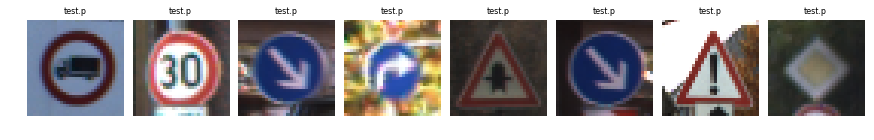

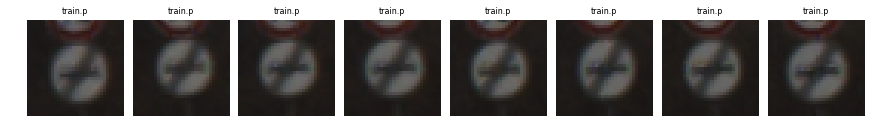

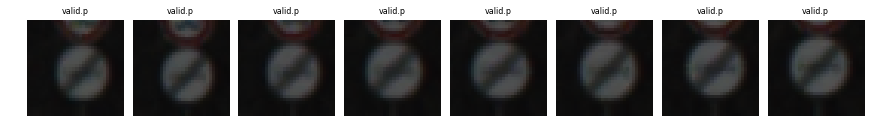

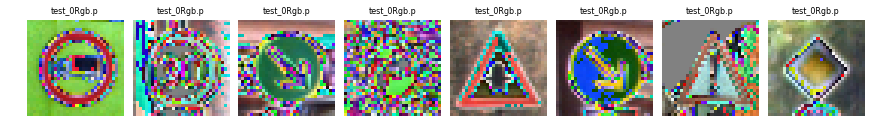

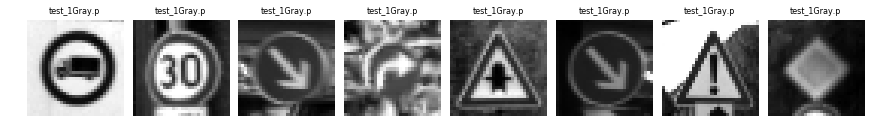

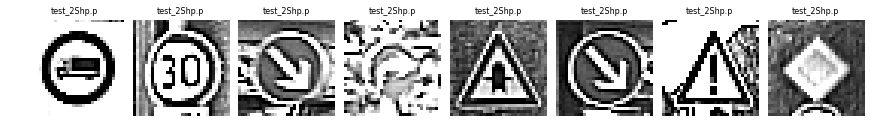

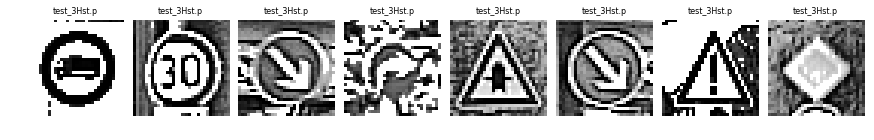

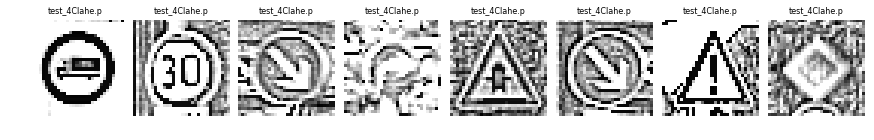

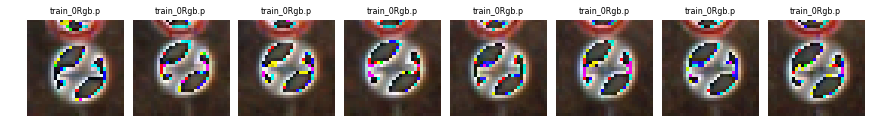

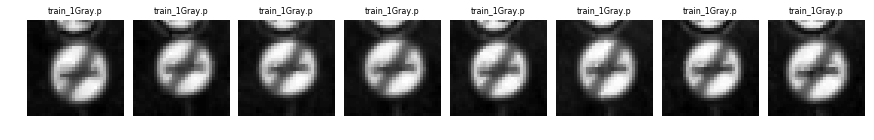

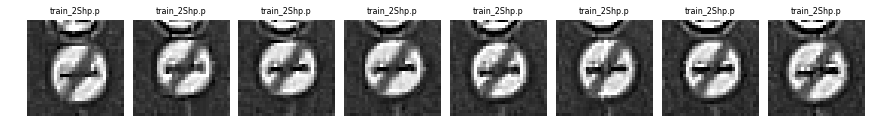

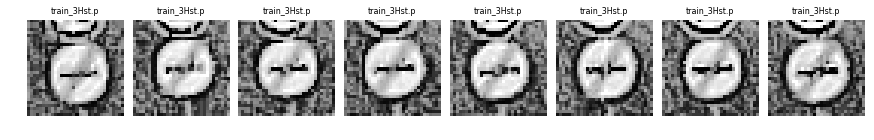

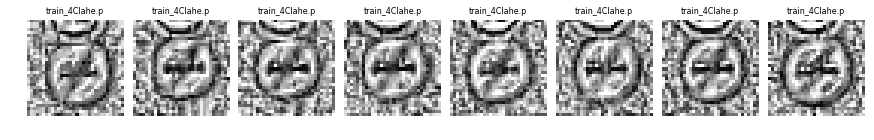

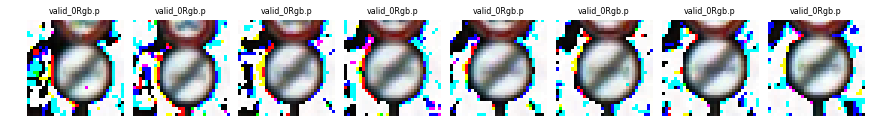

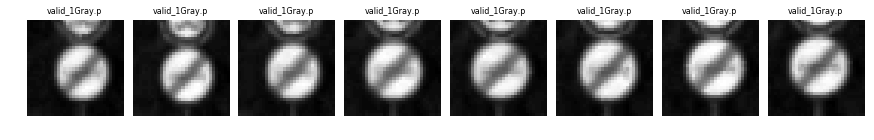

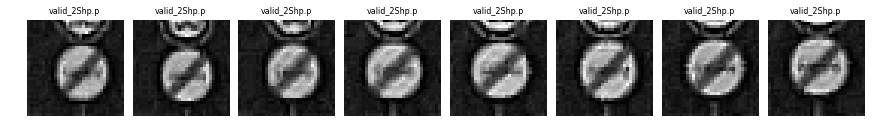

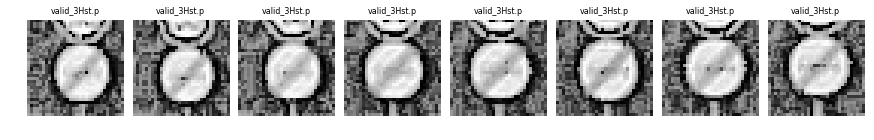

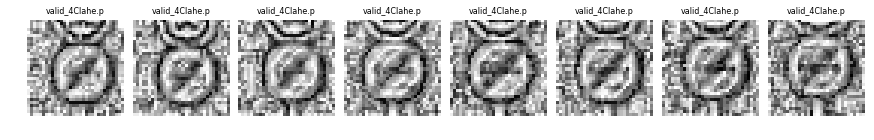

In [30]:
# Visualize the pre-processed Data
import matplotlib.pyplot as plt
creaShow()

if tRace1: print(msg1,' | [{:5}] {:8}: {}'.format('step2','creaShow','Show a few sample of the'))

> #### 2.1.2. Generate additional data

In [ ]:
import pickle
import numpy as np
from numpy import newaxis
import csv, cv2
import random

# Generate fake data up to get 500 to 3000 occurences per traffic signs
for i in range(500,3001,500):
    jitItall([pathData, pathPro], pathJit, i)
    
if tRace1: print(msg2,' | [{:5}] {:10} : {}'.format('step2','jitItall','Create fake data from preprocessed Data'))

...DONE 171009x1539  | [step2] jitItall     : [1/3] train.p / Download python objects

-----------------------------------------------------------------------------------------
Speed limit (20km/h)          : ---
Speed limit (30km/h)          : 
Speed limit (50km/h)          : 
Speed limit (60km/h)          : 
Speed limit (70km/h)          : 
Speed limit (80km/h)          : 
End of speed limit (80km/h)   : -
Speed limit (100km/h)         : 
Speed limit (120km/h)         : 
No passing                    : 
No passing for vehicles over 3: 
Right-of-way at the next inter: 
Priority road                 : 
Yield                         : 
Stop                          : 
No vehicles                   : 
Vehicles over 3.5 metric tons : -
No entry                      : 
General caution               : 
Dangerous curve to the left   : ---
Dangerous curve to the right  : -
Double curve                  : --
Bumpy road                    : -
Slippery road                 : 
Road narrows on the

C:\Users\mo\home\_INSTALL_\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in multiply


-
Wild animals crossing         : 
End of all speed and passing l: --
Turn right ahead              : 
Turn left ahead               : -
Ahead only                    : 
Go straight or right          : -
Go straight or left           : ---
Keep right                    : 
Keep left                     : --
Roundabout mandatory          : -
End of no passing             : --
End of no passing by vehicles : --

Legend: [ - = 100 ] , [ | = 500 ] 

[BEFORE] : ( X_train    , y_train    ) = ( 34799, 34799)
[AFTER ] : ( X_trainJIT , y_trainJIT ) = ( 39239, 39239)
[AFTER ] : ( qty data   ) = ( 4440 )
...DONE 171009x1539  | [step2] jitItall     : [2/3] train_1Gray.p / Create fake data

...DONE 171009x1539  | [step2] jitItall     : [3/3] Save python objects / JIT_full_500_train_1Gray.p
...DONE 171009x1539  | [step2] jitItall     : [3/3] Save python objects / JIT_addon_500_train_1Gray.p

...DONE 171009x1539  | [step2] jitItall     : [1/3] train_2Shp.p / Download python objects

------------------

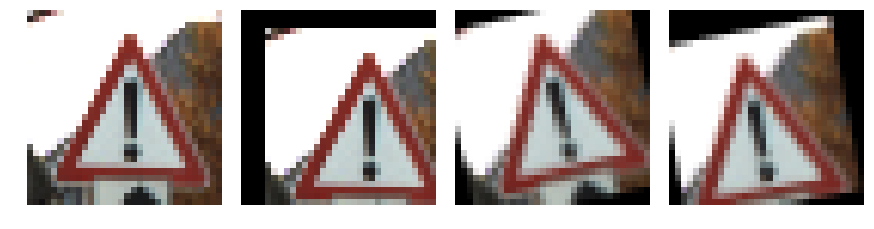

In [64]:
# Show the original image, the shifted version, the rotated version, and the combinaison of the two perturbations 
path   = pathData
infile = 'test.p'

dataImg, dataLabel, dataSize, dataCoord = hFct(path, infile, '').loadValid()
dataLabel, dataSize, dataCoord = None, None, None

a = 6
dtImg1, dtImg2, dtImg3, dtImg4 = dataImg[a], jitShift(dataImg[a], pXl=5), jitRot(dataImg[a]), jitRot(jitShift(dataImg[a], pXl=5))
dtImg0 = np.concatenate(([dtImg1], [dtImg2], [dtImg3], [dtImg4]))
showTrace(dtImg0,title='',xSize=1, ySize=4)

In [ ]:
# Show images of jittered data
creaShow([pathFull])

if tRace1: print(msg1,' | [{:5}] {}: {}'.format('step2','creaSpro''(''jitData'')''','creation of sprite images with jittered data'))

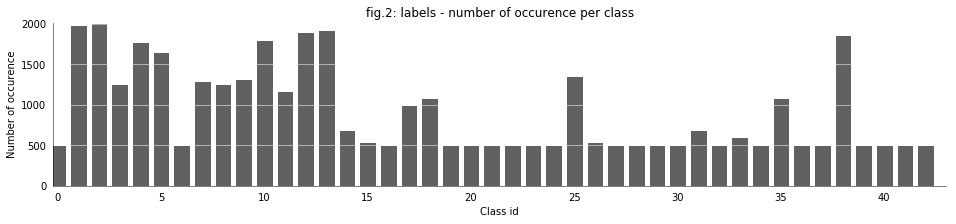

In [32]:
import prettyplotlib as ppl
import brewer2mpl
import matplotlib.pyplot as plt

# Show the list and histogram of jittered data
jitListChart(pathFull,'JIT_full_500_train.p','010')

fig.1: labels -  List of occurence per Traffic sign name
----------------------------------------------  ---------------------------------------------- 
Traffic sign name                        |Qty   Traffic sign name                        |Qty 
----------------------------------------------  ---------------------------------------------- 
Speed limit (20km/h)                     |1000  Double curve                             |1000
Speed limit (30km/h)                     |1980  Bumpy road                               |1000
Speed limit (50km/h)                     |2010  Slippery road                            |1000
Speed limit (60km/h)                     |1260  Road narrows on the right                |1000
Speed limit (70km/h)                     |1770  Road work                                |1350
Speed limit (80km/h)                     |1650  Traffic signals                          |1000
End of speed limit (80km/h)              |1000  Pedestrians                           

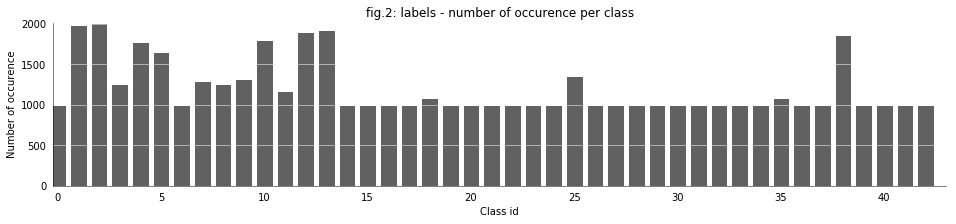

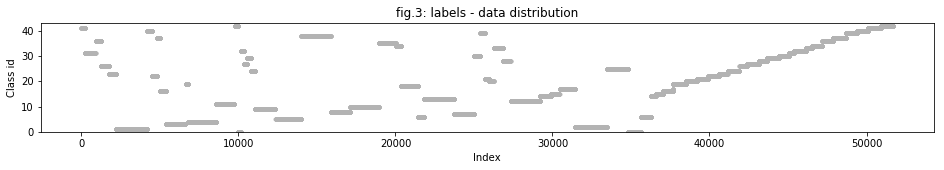

In [33]:
# Show the list and histogram of jittered data
jitListChart(pathFull,'JIT_full_1000_train.p','111')

### 2.2. Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#### Initialization

In [19]:
# Clean RAM
X_train, X_valid, X_test = None, None, None
y_train, y_valid, y_test = None, None, None

In [3]:
# Dictionary of data files
# note: for the next sprint > automatize by implementing the dict. creation into the jitItall function
dict1 = {}

dict1['F0INIT'] = ['train.p','valid.p','test.p']
dict1['F0RGB'] = ['train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F0GRAY'] = ['train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F0SHP'] = ['train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F0HST'] = ['train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F0CLAHE'] = ['train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F500INIT'] = ['JIT_full_500_train.p','valid.p','test.p']
dict1['F500RGB'] = ['JIT_full_500_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F500GRAY'] = ['JIT_full_500_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F500SHP'] = ['JIT_full_500_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F500HST'] = ['JIT_full_500_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F500CLAHE'] = ['JIT_full_500_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F1000INIT'] = ['JIT_full_1000_train.p','valid.p','test.p']
dict1['F1000RGB'] = ['JIT_full_1000_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F1000GRAY'] = ['JIT_full_1000_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F1000SHP'] = ['JIT_full_1000_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F1000HST'] = ['JIT_full_1000_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F1000CLAHE'] = ['JIT_full_1000_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F1500INIT'] = ['JIT_full_1500_train.p','valid.p','test.p']
dict1['F1500RGB'] = ['JIT_full_1500_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F1500GRAY'] = ['JIT_full_1500_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F1500SHP'] = ['JIT_full_1500_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F1500HST'] = ['JIT_full_1500_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F1500CLAHE'] = ['JIT_full_1500_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F2000INIT'] = ['JIT_full_2000_train.p','valid.p','test.p']
dict1['F2000RGB'] = ['JIT_full_2000_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F2000GRAY'] = ['JIT_full_2000_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F2000SHP'] = ['JIT_full_2000_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F2000HST'] = ['JIT_full_2000_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F2000CLAHE'] = ['JIT_full_2000_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F2500INIT'] = ['JIT_full_2500_train.p','valid.p','test.p']
dict1['F2500RGB'] = ['JIT_full_2500_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F2500GRAY'] = ['JIT_full_2500_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F2500SHP'] = ['JIT_full_2500_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F2500HST'] = ['JIT_full_2500_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F2500CLAHE'] = ['JIT_full_2500_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

dict1['F3000INIT'] = ['JIT_full_3000_train.p','valid.p','test.p']
dict1['F3000RGB'] = ['JIT_full_3000_train_0Rgb.p','valid_0Rgb.p','test_0Rgb.p']
dict1['F3000GRAY'] = ['JIT_full_3000_train_1Gray.p','valid_1Gray.p','test_1Gray.p']
dict1['F3000SHP'] = ['JIT_full_3000_train_2Shp.p','valid_2Shp.p','test_2Shp.p']
dict1['F3000HST'] = ['JIT_full_3000_train_3Hst.p','valid_3Hst.p','test_3Hst.p']
dict1['F3000CLAHE'] = ['JIT_full_3000_train_4Clahe.p','valid_4Clahe.p','test_4Clahe.p']

In [4]:
# Load and shuffle data
#fxTrain, fxValid, fxTest = dict1['F0INIT'][0], dict1['F0INIT'][1], dict1['F0INIT'][2] 
#pTrain, pValid, pTest    = pathData, pathData, pathData
#fxTrain, fxValid, fxTest = dict1['F0RGB'][0], dict1['F0RGB'][1], dict1['F0RGB'][2] 
#pTrain, pValid, pTest    = pathPro, pathPro, pathPro
#fxTrain, fxValid, fxTest = dict1['F0GRAY'][0], dict1['F0GRAY'][1], dict1['F0GRAY'][2] 
#pTrain, pValid, pTest    = pathPro, pathPro, pathPro
fxTrain, fxValid, fxTest = dict1['F3000GRAY'][0], dict1['F3000GRAY'][1], dict1['F3000GRAY'][2]
pTrain, pValid, pTest    = pathFull, pathPro, pathPro
#fxTrain, fxValid, fxTest = dict1['F3000RGB'][0], dict1['F3000RGB'][1], dict1['F3000RGB'][2]
#pTrain, pValid, pTest    = pathFull, pathPro, pathPro

In [ ]:
X_train, y_train, s_train, c_train = hFct(pTrain, fxTrain, '').loadValid()
X_valid, y_valid, s_valid, c_valid = hFct(pValid, fxValid, '').loadValid()
X_test,  y_test,  s_test,  c_test  = hFct(pTest , fxTest , '').loadValid()

try:
    X_train, y_train, s_train, c_train = shuffle(X_train, y_train, s_train, c_train)
    X_valid, y_valid, s_valid, c_valid = shuffle(X_valid, y_valid, s_valid, c_valid)
    X_test,  y_test,  s_test,  c_test  = shuffle(X_test,  y_test,  s_test,  c_test)
except:
    X_train, y_train = shuffle(X_train, y_train)
    X_valid, y_valid = shuffle(X_valid, y_valid)
    X_test,  y_test  = shuffle(X_test,  y_test)
    
    
if tRace1:print(msg1,' | [{}][{}] {:14} : {} {:8} = {:28} {}'.format('step2.5',0,'preliminaries','download', 'X_train',fxTrain,X_train.shape))
if tRace1:print(msg1,' | [{}][{}] {:14} : {} {:8} = {:28} {}'.format('step2.5',0,'preliminaries','download', 'X_valid',fxValid,X_valid.shape))
if tRace1:print(msg1,' | [{}][{}] {:14} : {} {:8} = {:28} {}'.format('step2.5',0,'preliminaries','download', 'X_test',fxTest,X_test.shape))

> #### 2.2.0. Helper functions

In [9]:
# ch parameter ----------------------------------------------------------------
if X_train.shape[-1] == 3:
    ch   = 3
    cMap = 'rgb'
elif X_train.shape[-1] == 1 or X_train.shape[-1] == 32:
    ch   = 1
    cMap = 'gray'
if tRace1:print()
if tRace1:print(msg1,' | [{}][{}] {:14} : {:17} = {}'.format('step2.5',0,'preliminaries','channel',ch))

In [14]:
# Tensorboard -----------------------------------------------------------------
class tBoard(object):
    def __init__(self):
        pass
    
    def dataSprite(dataImg, dataLabel, tRace=False):
        '''Calculate the validation dataset lenght'''
        if tRace: print('dataImg.shape: {}, dataLabel.shape: {}'.format(dataImg.shape,dataLabel.shape))
        import math
        num0 = math.ceil(len(dataImg)**0.5)
        num0 *= num0

        # TB.E-V: outImg, outLabel
        outImg, outLabel = np.empty((num0,dataImg.shape[1],dataImg.shape[2],dataImg.shape[3])), np.empty((num0))
        outImg[:dataImg.shape[0]], outLabel[:dataLabel.shape[0]] = dataImg[:].copy(), dataLabel[:].copy()
        outImg[dataImg.shape[0]:], outLabel[dataLabel.shape[0]:] = dataImg[-1], dataLabel[-1]
        if tRace: print('Image set.shape: {}, Label set.shape: {}'.format(outImg.shape,outLabel.shape))
       
        return outImg, outLabel

        
    def iNitb(X_valEV, embedding_size, embedding_input, tRace=tRace1, msg=msg2):
        # Combine all of the summary nodes into a single op -------------------
        merged = tf.summary.merge_all()
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',4,'TensorBoard','tf.summary.merge_all'))

        # Setup a 2D tensor variable that holds embedding ---------------------
        embedding  = tf.Variable(tf.zeros([len(X_valEV), embedding_size]), name="test_embedding") # 4489, embedding_size
        assignment = embedding.assign(embedding_input)
        if tRace:print(msg,' | [{}][{}] {:14}: {}, {}'.format('step2.5',4,'TensorBoard','embedding','assignment'))
        
        return merged, embedding, assignment

    def logWriter(sess, tRace=tRace1, msg=msg2):
        # Create a log writer. run 'tensorboard --logdir=./logs/nn_logs' ------
        #from datetime import datetime as dt
        now = dt.now()
        str0= now.strftime("%y%m%dx%H%M")
        str1= "./logs/nn_logs/" + str0 + "/"
        writer = tf.summary.FileWriter(str1, sess.graph) # for 0.8
        writer.add_graph(sess.graph)
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',5,'TensorBoard','create a log writer'))

        return str0, str1, writer

    # Embedding Visualization: configuration ---------------------------------- 
    def eVisu(sprImg,sprTsv,sprPath,LOGDIR,sIze,embedding,writer):
        '''TensorBoard: Embedding Visualization'''
        # Note: use the same LOG_DIR where you stored your checkpoint.
        inFileImg, inFileTvs = sprPath+sprImg, sprPath+sprTsv
        outFileImg, outFileTvs = LOGDIR+sprImg, LOGDIR+sprTsv
        
        from shutil import copyfile
        copyfile(inFileImg,outFileImg)
        copyfile(inFileTvs,outFileTvs)

        # 4. Format:
        config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()
        
        # 5. Add as much embedding as is necessary (Here we add only one)
        embedding_config = config.embeddings.add()
        embedding_config.tensor_name = embedding.name         #embedding_var.name
        embedding_config.sprite.image_path = outFileImg
        
        # 6. Link this tensor to its labels (e.g. metadata file)
        embedding_config.metadata_path = outFileTvs

        # 7. Specify the width and height of a single thumbnail.
        embedding_config.sprite.single_image_dim.extend([sIze, sIze])
        
        # 8. Saves a configuration file that TensorBoard will read during startup
        tf.contrib.tensorboard.plugins.projector.visualize_embeddings(writer, config)
           
        return config, embedding_config

In [15]:
# Classifier ------------------------------------------------------------------
class tSign(object):
    def __init__(self):
        pass
    
    # In[step2.5]: Preliminaries - initialization -----------------------------
    def iNit(cMap, n_classes, tRace=tRace1, msg=msg2):
        # Remove previous Tensors and Operations ------------------------------
        tf.reset_default_graph()
        sess = tf.InteractiveSession() # sess = tf.Session()
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',0,'initiation','remove previous tensors and operations'))

        # Setup placeholders: features and labels -----------------------------       
        if cMap =='rgb':
            ch = 3
        elif cMap =='gray':
            ch = 1
        else:
            raise ValueError('Current cMap:',cMap,'. cMap should be ''rgb'' or ''gray''')
            
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',0,'channel',ch))
        
        x = tf.placeholder(tf.float32, (None, 32, 32, ch), name='input')  
        y = tf.placeholder(tf.uint8, (None), name='label') # y = tf.placeholder(tf.int32, (None, len(y_train)))
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',0,'placeholders','features and labels'))

        # One-Hot -------------------------------------------------------------
        one_hot_y = tf.one_hot(y, n_classes)
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',0,'initiation','one_hot_y'))

        # Add dropout to input and hidden layers ------------------------------
        keep_prob = tf.placeholder(tf.float32) # probability to keep units
        if tRace:print(msg,' | [{}][{}] {:14}: {}, {}'.format('step2.5',0,'placeholders','keep_prob','add dropout to input and hidden layers'))
       
        # Add image summary ---------------------------------------------------
        tf.summary.image('input', x, 8)
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',0,'TensorBoard','add image summary'))
               
        return sess, x, y, ch, one_hot_y, keep_prob

        if tRace:print(msg1,' | [{}][{}] {:14}: {}'.format('step2.5',0,'placeholders','initialization'))
            
            
    # In[step2.5]: helper functions - conv_layer, fc_layer
    # conv_layer: Build a convolutional layer ---------------------------------
    def conv_layer(input,filter_size,size_in,size_out,nAme="conv", mu=0, sigma=0.1,pAdding='VALID',maxPool=True, aCtivation='relu', leak=0.2, tRace=tRace1, msg=msg2):
        # Traces
        if tRace:a = 0

        with tf.name_scope(nAme):
            # Layer: Convolutional. Input = 32x32xsize_in. Output = 28x28xsize_out.
            shape0 = [filter_size, filter_size, size_in, size_out]
            w = tf.Variable(tf.truncated_normal(shape0, mean = mu, stddev = sigma), name=nAme+"W")
            b = tf.Variable(tf.constant(0.1, shape=[size_out]), name=nAme+"B")
            conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding=pAdding)
            # Traces
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','conv.shape',conv.get_shape()))
 
            # Activation
            if aCtivation =='relu':
                act  = tf.nn.relu(tf.add(conv, b)) #act = tf.nn.relu(conv + b)
                str9 = 'RELU'
            else:
                f1  = 0.5 * (1 + leak)
                f2  = 0.5 * (1 - leak)
                act = f1 * tf.add(conv, b) + f2 * abs(tf.add(conv, b))  
                str9 = 'LEAKY RELU'
            # Traces
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','act.shape '+str9,act.get_shape()))
            
            # Add histogram summaries for weights and biases
            tf.summary.histogram(nAme+"_weights", w)
            tf.summary.histogram(nAme+"_biases", b)
            tf.summary.histogram(nAme+"_activations", act)
            
            if maxPool:
                # Pooling. Input = 28x28xsize_out. Output = 14x14xsize_out.
                output = tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=pAdding)
                # Traces
                if tRace:a += 1
                if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','max_pool.shape',output.get_shape()))
            else:
                output = act
                # Traces
                if tRace:a += 1
                if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','act.shape',output.get_shape()))

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',1,'helper fct','conv_layer', 'build a convolutional layer'))
            
        return output    


    # fc_layer: Build a full connected layer ----------------------------------
    def fc_layer(input, size_in, size_out, nAme="fc", act = True, drop= True, keep_prob = tf.placeholder(tf.float32), aCtivation='relu', leak=0.2, tRace=tRace1, msg=msg2):
        # Traces
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','input.shape',input.get_shape()))
        
        with tf.name_scope(nAme):
            # Layer: Convolutional. Input = size_in. Output = size_out.
            w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=0.1), name=nAme+"W")
            b = tf.Variable(tf.constant(0.1, shape=[size_out]), name=nAme+"B")
            x = tf.add(tf.matmul(input, w), b)
            # Add histogram summaries for weights and biases
            tf.summary.histogram(nAme+"_weights", w)
            tf.summary.histogram(nAme+"_biases", b)
            # Traces
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','x.shape',x.get_shape()))
            
            
            if act: # Activation and histogram summaries:
                if aCtivation =='relu':
                    x = tf.nn.relu(x)
                    str9 = 'RELU'
                else:
                    f1  = 0.5 * (1 + leak)
                    f2  = 0.5 * (1 - leak)
                    x   = f1 * x + f2 * abs(x)  
                    str9 = 'LEAKY RELU'
                tf.summary.histogram(nAme+"_activations", x)
                # Traces
                if tRace:a += 1
                if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','act.shape '+str9,x.get_shape()))
            if drop: # Dropout
                x = tf.nn.dropout(x, keep_prob)
                # Traces
                if tRace:a += 1
                if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'architecture','conv_layer fct','dropout.shape',x.get_shape()))

            return x

        if tRace:print(msg1,' | [{}][{}][{}] {:14}: {}, {}'.format('step2.5',1,'helper fct','fc_layer','build a full connected layer'))


    # Define cost function ----------------------------------------------------
    def loss(logits, one_hot_y, rate, mod0, tRace=tRace1, msg=msg2):
        with tf.name_scope("cost"):
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y, name="xent")  
            #cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, one_hot_y) #<-- error msg
            lossOpe = tf.reduce_mean(cross_entropy, name="loss")
            optimizer = tf.train.AdamOptimizer(learning_rate = rate, name="optAdam")
            trainingOpe = optimizer.minimize(lossOpe, name="optMin")
            # Add scalar summary for loss (cost) tensor
            tf.summary.scalar(mod0+'_loss', lossOpe)        
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',3,'tf.name_scope','cost'))
        
        return lossOpe, trainingOpe


    # Define accuracy fct -----------------------------------------------------
    def accuracy(logits, one_hot_y, mod0, tRace=tRace1, msg=msg2):
        with tf.name_scope("accuracy"):
            correctPrd = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
            accuOpe = tf.reduce_mean(tf.cast(correctPrd, tf.float32))
            # Add scalar summary for accuracy tensor
            tf.summary.scalar(mod0+'_accuracy', accuOpe)    
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',3,'tf.name_scope','accuracy'))
        
        return accuOpe

In [16]:
class modArc(tSign):
    def __init__(self):
        pass

    # Define architecture model1 ----------------------------------------------
    def model1(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):  # Lenet5
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        x = tSign.conv_layer(x, 5, ch, 6, 'layer1', mu, sigma, 'VALID')
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))

        # Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        x = tSign.conv_layer(x, 5, 6, 16, 'layer2', mu, sigma, 'VALID')
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))
        
        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            x = flatten(x)  # tf.reshape(x, [-1, n_input])
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))

        # Layer 3: Fully Connected{In:400;Out:120} > Activ. > Dropout
        x = tSign.fc_layer(x, 400, 120, 'layer3', True, True, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))
        
        # Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        x = tSign.fc_layer(x, 120, 84, 'layer4', True, True, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))
        
        # Layer 5: Fully Connected{In:84;Out:43}
        logits = tSign.fc_layer(x, 84, 43, 'layer5', False, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model1','x.shape',x.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model1','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size
    
    
    
    # Define architecture model2 ----------------------------------------------
    def model2(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        # def conv_layer      (x,filter_size,size_in,size_out,nAme, mu, sigma,pAdding='VALID',maxPool=True)
        xL1 = tSign.conv_layer(x, 5, ch, 6, 'layer1', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL2 = tSign.conv_layer(xL1, 5, 6, 16, 'layer2', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL2.shape',xL2.get_shape()))
        
        # Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL3 = tSign.conv_layer(xL2, 5, 16, 400, 'layer3', mu, sigma, 'VALID', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL3.shape',xL3.get_shape()))

        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            xF2 = flatten(xL2)
            tf.summary.histogram('xF2-xD2', xF2)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xL3)
            tf.summary.histogram('xF3-xD3', xF3)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF3,xF2], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xFI.shape',xFI.get_shape()))
            tf.summary.histogram('xFI', xFI)  # Add histogram summaries

        # Dropout: 
        xDI = tf.nn.dropout(xFI, keep_prob)

        # Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF4 = tSign.fc_layer(xDI, 800, 120, 'layer4', True, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xF4.shape',xF4.get_shape()))
        
        # Layer 5: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF5 = tSign.fc_layer(xF4, 120, 84, 'layer5', True, False, keep_prob)
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xF5.shape',xF5.get_shape()))
              
        # Layer 6: Fully Connected{In:84;Out:43}
        logits = tSign.fc_layer(xF5, 84, 43, 'layer6', False, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','logits.shape',logits.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model2','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size


    # Define architecture model2b ----------------------------------------------
    def model2b(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        # def conv_layer      (x,filter_size,size_in,size_out,nAme, mu, sigma,pAdding='VALID',maxPool=True)
        xL1 = tSign.conv_layer(x, 5, ch, 6, 'layer1', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL2 = tSign.conv_layer(xL1, 5, 6, 16, 'layer2', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL2.shape',xL2.get_shape()))
        
        # Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL3 = tSign.conv_layer(xL2, 5, 16, 400, 'layer3', mu, sigma, 'VALID', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL3.shape',xL3.get_shape()))

        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            xF2 = flatten(xL2)
            tf.summary.histogram('xF2-xD2', xF2)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xL3)
            tf.summary.histogram('xF3-xD3', xF3)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF3,xF2], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xFI.shape',xFI.get_shape()))
            tf.summary.histogram('xFI', xFI)  # Add histogram summaries


        # Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF4 = tSign.fc_layer(xFI, 800, 120, 'layer4', True, True, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xF4.shape',xF4.get_shape()))
        
        # Layer 5: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF5 = tSign.fc_layer(xF4, 120, 84, 'layer5', True, True, keep_prob)
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xF5.shape',xF5.get_shape()))
              
        # Layer 6: Fully Connected{In:84;Out:43}
        logits = tSign.fc_layer(xF5, 84, 43, 'layer6', False, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','logits.shape',logits.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model2','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size
        
        
    # Define architecture model2c ----------------------------------------------
    def model2c(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        # def conv_layer      (x,filter_size,size_in,size_out,nAme, mu, sigma,pAdding='VALID',maxPool=True)
        xL1 = tSign.conv_layer(x, 5, ch, 6, 'layer1', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL2 = tSign.conv_layer(xL1, 5, 6, 16, 'layer2', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL2.shape',xL2.get_shape()))
        
        # Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL3 = tSign.conv_layer(xL2, 5, 16, 400, 'layer3', mu, sigma, 'VALID', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL3.shape',xL3.get_shape()))

        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            xF2 = flatten(xL2)
            tf.summary.histogram('xF2-xD2', xF2)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xL3)
            tf.summary.histogram('xF3-xD3', xF3)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF3,xF2], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xFI.shape',xFI.get_shape()))
            tf.summary.histogram('xFI', xFI)  # Add histogram summaries


        # Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF4 = tSign.fc_layer(xFI, 800, 120, 'layer4', True, True, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xF4.shape',xF4.get_shape()))
        
        # Layer 5: Fully Connected{In:120;Out:43} > Activ. > Dropout
        logits = tSign.fc_layer(xF4, 120, 43, 'layer5', True, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','logits.shape',logits.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model2','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size       
        
    # Define architecture model2d ---------------------------------------------
    def model2d(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > mxPooling{In:28x28x6;Out:14x14x6}
        xL1 = tSign.conv_layer(x, 5, ch, 6, 'layer1', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL2 = tSign.conv_layer(xL1, 5, 6, 16, 'layer2', mu, sigma, 'VALID', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL2.shape',xL2.get_shape()))
        
        # Layer 3: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL3 = tSign.conv_layer(xL2, 5, 16, 400, 'layer3', mu, sigma, 'VALID', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','xL3.shape',xL3.get_shape()))

        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            xF2 = flatten(xL2)
            tf.summary.histogram('xF2-xD2', xF2)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xL3)
            tf.summary.histogram('xF3-xD3', xF3)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF3,xF2], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model2','xFI.shape',xFI.get_shape()))
            tf.summary.histogram('xFI', xFI)  # Add histogram summaries

        # Dropout: 
        xDI = tf.nn.dropout(xFI, keep_prob)

        # Layer 4: Fully Connected{In:120;Out:84} > Activ. > Dropout
        logits = tSign.fc_layer(xDI, 800, 43, 'layer4', False, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model2','logits.shape',logits.get_shape()))
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model2','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size

    
    # Define architecture model3 ----------------------------------------------
    def model3(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','ch',ch))
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','x.shape',x.get_shape()))
        
        # Layer 1: Conv{In:32x32xch;Out:32x32xch}
        #def conv_layer(x, 1, ch, 3, 'layer1', mu, sigma, 'SAME',maxPool=True, layer0=False, tRace=tRace1, msg=msg2):
        xL1 = tSign.conv_layer(x, 1, ch, 3, 'layer1', mu, sigma, 'SAME', False,layer0=False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:32x32xch;Out:32x32x32}
        xL2 = tSign.conv_layer(xL1, 5, 3, 32, 'layer2', mu, sigma, 'SAME', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL2.shape',xL2.get_shape()))
        
        # Layer 3: Conv{In:32x32x32;Out:32x32x32} > Activ. > mxPooling{In:32x32x32;Out:16x16x32}
        xL3 = tSign.conv_layer(xL2, 5, 32, 32, 'layer3', mu, sigma, 'SAME', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL3.shape',xL3.get_shape()))
        
        # Dropout: 
        xD1 = tf.nn.dropout(xL3, keep_prob)

        # Layer 4: Conv{In:16x16x32;Out:16x16x64} > Activ. > mxPooling{In:16x16x64;Out:16x16x64}
        xL4 = tSign.conv_layer(xD1, 5, 32, 64, 'layer4', mu, sigma, 'SAME', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL4.shape',xL4.get_shape()))
        
        # Layer 5: Conv{In:16x16x64;Out:16x16x64} > Activ. > mxPooling{In:16x16x64;Out:8x8x16}
        xL5 = tSign.conv_layer(xL4, 5, 64, 64, 'layer5', mu, sigma, 'SAME', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL5.shape',xL5.get_shape()))
 
        # Dropout: 
        xD2 = tf.nn.dropout(xL5, keep_prob)

        # Layer 6: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL6 = tSign.conv_layer(xD2, 5, 64, 128, 'layer6', mu, sigma, 'SAME', False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL6.shape',xL6.get_shape()))
 
        # Layer 7: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL7 = tSign.conv_layer(xL6, 5, 128, 128, 'layer7', mu, sigma, 'SAME', True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xL7.shape',xL7.get_shape()))
 
        # Dropout: 
        xD3 = tf.nn.dropout(xL7, keep_prob)

        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten'):
            xF1 = flatten(xD1)   # tf.reshape(xD1, [-1, n_input])
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','archi','define model3','xF1.shape',xF1.get_shape()))
            xF2 = flatten(xD2)
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','archi','define model3','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xD3)
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','archi','define model3','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF1,xF2,xF3], 1)
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','archi','define model3','xFI.shape',xFI.get_shape()))

        # Layer 9: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF9 = tSign.fc_layer(xFI, 14336, 1024, 'layer9', True, True, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xF9.shape',xF9.get_shape()))
        
        # Layer 10: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF10 = tSign.fc_layer(xF9, 1024, 1024, 'layer10', True, True, keep_prob)
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','xF10.shape',xF10.get_shape()))
        

        # Layer 11: Fully Connected{In:84;Out:43}
        logits = tSign.fc_layer(xF10, 1024, 43, 'layer11', False, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'-','architecture','define model3','logits.shape',logits.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model3','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size
    
    
    # Define architecture model4 ----------------------------------------------
    def model4(x, ch, mu, sigma, keep_prob, tRace=tRace1, msg=msg2):
    # INPUT -> [CONV -> RELU -> CONV -> RELU -> POOL]*3 -> [FC -> RELU]*2 -> FC 
        if tRace:a = 0
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','ch',ch))
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','x.shape',x.get_shape()))
        
        # < 1 > CONV -> RELU -> CONV -> RELU -> POOL --------------------------
        # Layer 1: Conv{In:32x32xch;Out:28x28x6} > Activ. > {Out:28x28x6}
        # note: (w - f + 2*p)/s +1  -> 28 = (32 - 5 + 2*0)/1 + 1
        xL1 = tSign.conv_layer(x, 5, ch, 32, 'layer1', mu, sigma, 'VALID',maxPool=False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL1.shape',xL1.get_shape()))

        # Layer 2: Conv{In:28x28x6;Out:24x24x16} > Activ. > mxPooling{In:24x24x16;Out:12x12x16}
        xL2 = tSign.conv_layer(xL1, 3, 32, 32, 'layer2', mu, sigma, 'VALID',maxPool=True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL2.shape',xL2.get_shape()))


        # < 2 > CONV -> RELU -> CONV -> RELU -> POOL --------------------------
        # Layer 3: Conv{In:12x12x16;Out:8x8x32} > Activ. > {Out:8x8x32}
        xL3 = tSign.conv_layer(xL2, 3, 32, 64, 'layer3', mu, sigma, 'VALID',maxPool=False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL3.shape',xL3.get_shape()))

        # Layer 4: Conv{In:8x8x32;Out:4x4x64} > Activ. > mxPooling{In:4x4x64;Out:2x2x64}
        xL4 = tSign.conv_layer(xL3, 3, 64, 128, 'layer4', mu, sigma, 'VALID',maxPool=True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL4.shape',xL4.get_shape()))


        # < 3 > CONV -> RELU -> CONV -> RELU -> POOL --------------------------
        # Layer 5: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL5 = tSign.conv_layer(xL4, 2, 128, 512, 'layer3', mu, sigma, 'VALID',maxPool=False)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL5.shape',xL5.get_shape()))

        # Layer 6: Conv{In:14x14x6;Out:10x10x16} > Activ. > mxPooling{In:10x10x16;Out:5x5x16}
        xL6 = tSign.conv_layer(xL5, 2, 512, 1024, 'layer4', mu, sigma, 'VALID',maxPool=True)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xL6.shape',xL6.get_shape()))


        # < 1 > FC -> RELU
        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten1'):
            xF2 = flatten(xL2)
            tf.summary.histogram('xF2-xD2', xF2)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xF2.shape',xF2.get_shape()))
            xF3 = flatten(xL3)
            tf.summary.histogram('xF3-xD3', xF3)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xF3.shape',xF3.get_shape()))
            xFI = tf.concat([xF3,xF2], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xFI.shape',xFI.get_shape()))
            tf.summary.histogram('xFI', xFI)  # Add histogram summaries
            # Activation
            actxFI = tf.nn.relu(xFI) #act = tf.nn.relu(conv + b)
            tf.summary.histogram('act_xFI', actxFI) # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'archi','define model4','actxFI.shape',actxFI.get_shape()))
            

        # < 2 > FC -> RELU
        # Flatten. Input = 5x5xsize_out. Output = 400.
        with tf.name_scope('flatten2'):
            xF4 = flatten(xL4)
            tf.summary.histogram('xF4-xD4', xF4)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xF4.shape',xF4.get_shape()))
            xF5 = flatten(xL5)
            tf.summary.histogram('xF5-xD5', xF5)  # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xF5.shape',xF5.get_shape()))
            xFII = tf.concat([xF5,xF4], 1)
            if tRace: a += 1
            if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'archi','define model4','xFII.shape',xFII.get_shape()))
            tf.summary.histogram('xFII', xFII)  # Add histogram summaries
            # Activation
            actxFII = tf.nn.relu(xFII) #act = tf.nn.relu(conv + b)
            tf.summary.histogram('act_xFII', actxFII) # Add histogram summaries
            if tRace:a += 1
            if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'archi','define model4','actxFII.shape',actxFII.get_shape()))


        # Dropout:
        xFIII = tf.concat([actxFII,actxFI], 1)
        if tRace:a += 1
        if tRace:print(msg,' | [{}][{}][{}] {:14}: {} - {} = {}'.format('step2.5','-',a,'archi','define model4','xFIII.shape',xFIII.get_shape()))
        xDI = tf.nn.dropout(xFIII, keep_prob)

        # Layer 8: Fully Connected{In:19808;Out:9904} > Activ. > Dropout
        xF8 = tSign.fc_layer(xDI, 19808, 9904, 'layer8', True, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xF8.shape',xF8.get_shape()))

        # Layer 9: Fully Connected{In:9904;Out:1238} > Activ. > Dropout
        xF9 = tSign.fc_layer(xF8, 9904, 1238, 'layer9', True, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xF9.shape',xF9.get_shape()))

        # Layer 11: Fully Connected{In:1238;Out:619} > Activ. > Dropout
        xF11 = tSign.fc_layer(xF9, 1238, 619, 'layer11', True, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xF11.shape',xF11.get_shape()))

        # Layer 12: Fully Connected{In:619;Out:120} > Activ. > Dropout
        xF12 = tSign.fc_layer(xF11, 619, 120, 'layer12', True, False, keep_prob)   # xFI.get_shape()[-1]
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xF12.shape',xF12.get_shape()))
        
        # Layer 13: Fully Connected{In:120;Out:84} > Activ. > Dropout
        xF13 = tSign.fc_layer(xF12, 120, 84, 'layer13', True, False, keep_prob)
        if tRace: a += 1 
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','xF13.shape',xF13.get_shape()))
              
        # Layer 14: Fully Connected{In:84;Out:43}
        logits = tSign.fc_layer(xF13, 84, 43, 'layer14', False, False, keep_prob)
        if tRace: a += 1
        if tRace:print(msg,' | [{}][{}] {:14}: {} - {} = {}'.format('step2.5',a,'architecture','define model4','logits.shape',logits.get_shape()))  
        
        # EMBBEDED VISUALIZER
        embedding_input = logits
        embedding_size  = 43

        if tRace:print(msg1,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','define model4','EMBBEDED VISUALIZER'))
        
        return logits, embedding_input, embedding_size
    
        

### 2.3. Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

> #### 2.3.0. Helper functions

In [12]:
class trainMod(object):
    def __init__(self, sess):
        self.sess = sess
    
    # Initialization fo the training of the model -----------------------------
    def initTrain(self,tRace=tRace1, msg=msg2):
        # Initiate the Saves and restores mechanisum --------------------------
        metaModel = tf.train.Saver()
        if tRace:print(msg,' | [{}][{}] {:14}: {}'.format('step2.5',5,'metaModel','initiate saves & restores metaModel'))
        
        # Initialize all variables --------------------------------------------
        self.sess.run(tf.global_variables_initializer())
        n_train = len(X_train)
        if tRace:print(msg,' | [{}][{}] {:14}: {}, {} = {}'.format('step2.5',5,'initiation','initialize all variables','len X_train',n_train))
        
        return metaModel, n_train


    def modTrain(self,ltTrain,ltValid,ltTb,EPOCHS,BATCH_SIZE,trainingOpe,x,y,keep_prob,dropout,writer,assignment,merged,lossOpe,accuOpe,str1,metaModel,mod0,tRace=tRace1, msg=msg2):
        self.sess.run(tf.global_variables_initializer())
        n_train = len(ltTrain[0])
        n_valid = len(X_valid)
        total_cost, total_accuracy = 0, 0
        
        for i0 in range(EPOCHS):
            for start, end in zip(range(0, n_train, BATCH_SIZE), range(BATCH_SIZE, n_train+1, BATCH_SIZE)):
                xBatch, yBatch = ltTrain[0][start:end], ltTrain[1][start:end]
                self.sess.run(trainingOpe, feed_dict={x: xBatch, y: yBatch, keep_prob: dropout}) # dropout})
                #sess.run(assignment, feed_dict={x: xBatch, y: yBatch, keep_prob: 0.5})
        
            # TensorBoard: Embedding Visualization ----------------------------
            config, embedding_config = tBoard.eVisu(ltTb[0],ltTb[1],ltTb[2],ltTb[3],ltTb[4],ltTb[5],writer)
            
            # ----------------------------------------------- 
            #asgnVal = self.sess.run(assignment, feed_dict={x: ltValid[0], y: ltValid[1], keep_prob: 1})
            
            for start, end in zip(range(0, n_valid, BATCH_SIZE), range(BATCH_SIZE, n_valid+1, BATCH_SIZE)):
                xBatch, yBatch = X_valid[start:end], y_valid[start:end]
                cost, accuracy = self.sess.run([lossOpe, accuOpe], feed_dict={x: xBatch, y: yBatch, keep_prob: 1})
                total_cost     += (cost     * len(xBatch))
                total_accuracy += (accuracy * len(xBatch))
            
            total_cost     = total_cost / n_valid
            total_accuracy = total_accuracy / n_valid
            
            summary = self.sess.run(merged, feed_dict={x: X_valid, y: y_valid, keep_prob: 1})
                
            #metaModel.save(sess, str1)
            if not os.path.exists(str1):
                os.makedirs(str1)
            metaModel.save(self.sess, os.path.join(str1, mod0+'.ckpt')) #, i0)
        
            # Write summary
            writer.add_summary(summary, i0)
        
            # Report the accuracy
            print('Epoch: {:3} | cost : {:.3f} | Val.accu : {:.3f}'.format(i0, total_cost, total_accuracy)) #| asgnVal : {} ... ,asgnVal))

#        validation_accuracy = tSign.evaluate(ltValid[0], ltValid[1], accuOpe, BATCH_SIZE, x, y)        
#        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if tRace:print("...model saved")
        if tRace:print()
        if tRace:print(msg,' | [{}] {:14}'.format('step2.5','Train the model'))

    # Measure the test accuracy: ----------------------------------------------
    def modMeasure(dataImg,dataLabel,metaModel,str1,accuOpe,x,y,keep_prob):
        with tf.Session() as sess:    
            ## Step 13 - Need to initialize all variables
            sess.run(tf.global_variables_initializer())

            ## Step 14 - Evaluate the performance of the model on the test set
            metaModel.restore(sess, tf.train.latest_checkpoint(str1)) #pathMod))

            n_data = len(dataImg)
            total_accuracy = 0

            for start, end in zip(range(0, n_data, BATCH_SIZE), range(BATCH_SIZE, n_data+1, BATCH_SIZE)):
                xBatch, yBatch = dataImg[start:end], dataLabel[start:end]
                accuracy = sess.run(accuOpe, feed_dict={x: xBatch, y: yBatch, keep_prob: 1})
                total_accuracy += (accuracy * len(xBatch))
            
            total_accuracy = total_accuracy / n_data
            
            return total_accuracy

In [13]:
def report(X_train, y_train, X_valid, y_valid, X_test, y_test, X_valEV, y_valEV, X_testEV, y_testEV):
    
    # Initialization
    #if tRace1:a = input('[0] < press the keyboard to continue >')
    
    sess, x, y, ch, one_hot_y, keep_prob = tSign.iNit(cMap, n_classes)
    if tRace:print(msg2,' | [{}][{}] {:14}: {}'.format('step2.5',0,'placeholders','features and labels'))
    #if tRace1:a = input('[1] < press the keyboard to continue >')
    
    # Create model ----------------------------------
    logits, embedding_input, embedding_size = modArc.model1(x,ch,0,0.1,keep_prob)  #dropout)
#    logits, embedding_input, embedding_size = modArc.model2(x,ch,0,0.1,keep_prob)
#    logits, embedding_input, embedding_size = modArc.model2b(x,ch,0,0.1,keep_prob)
#    logits, embedding_input, embedding_size = modArc.model2c(x,ch,0,0.1,keep_prob)
#    logits, embedding_input, embedding_size = modArc.model2d(x,ch,0,0.1,keep_prob)
#    logits, embedding_input, embedding_size = modArc.model3(x,ch,0,0.1,keep_prob)
#    logits, embedding_input, embedding_size = modArc.model4(x,ch,0,0.1,keep_prob)
    mod0 = 'model1' # 'model1' 'model2' 'model2b' 'model2c' 'model2d' 'model3' 'model4'
    if tRace:print(msg2,' | [{}][{}] {:14}: {}, {}'.format('step2.5',2,'architecture','create '+mod0,'EMBBEDED VISUALIZER'))
    
    
    # In[step2.5]: train the model
    print()
    print('Training... {}: {}, {}: {}, {}: {}, {}: {}, {}: {}'.format('model', mod0,'rate',rate,'epochs',EPOCHS,'batch size',BATCH_SIZE,'keep_prob',dropout))
    print()
    
    # Create cost & accuracy function ---------------------------------------------
    lossOpe, trainingOpe = tSign.loss(logits, one_hot_y, rate, mod0)
    accuOpe = tSign.accuracy(logits, one_hot_y, mod0)
    
    # TensorBoard: initialization of the Embedding Visualization ------------------
    merged, embedding, assignment = tBoard.iNitb(X_valEV, embedding_size, embedding_input)
    
    # Initialize the training of the model
    metaModel, n_train = trainMod(sess).initTrain()
    
    # Create a log writer. run 'tensorboard --logdir=./logs/nn_logs'
    str0, str1, writer = tBoard.logWriter(sess)
    LOGDIR = str1
    
    # Define the training function ------------------------------------------------
    ltTrain = [X_train,y_train]
    ltValid = [X_valEV,y_valEV]
    ltTb    = [sprImg,sprTsv,sprPath,LOGDIR,32,embedding]
    
    # Train the model -------------------------------------------------------------
    trainMod(sess).modTrain(ltTrain,ltValid,ltTb,EPOCHS,BATCH_SIZE,trainingOpe,x,y,keep_prob,dropout,writer,assignment,merged,lossOpe,accuOpe,str1,metaModel,mod0)
    if tRace:print(msg0,' | [{}] {:14}'.format('step2.5','train the model'))
    if tRace:print()
    
    # Measure the accuracy: ---------------------------------------------------
    total_accuracy = trainMod.modMeasure(X_valid,y_valid,metaModel,str1,accuOpe,x,y,keep_prob)
    print("Validation Accuracy = {:.3f}".format(total_accuracy))
    
    total_accuracy = trainMod.modMeasure(X_test,y_test,metaModel,str1,accuOpe,x,y,keep_prob)
    print("Test Accuracy = {:.3f}".format(total_accuracy))
    
    if tRace:print(msg0,' | [{}] {:14}'.format('step2.5','measure the validation and the test accuracies'))



In [12]:
def showAccu(ltLog,ltAccTst,ltAccVal,ltCost, cOlor = 'r', sTr = 'model1 - variation on learning rate', ratio = 1000):
    N = len(ltLog)
    # Plot both the validation and the test accuracies with various learning rates
    ltCost = [x * ratio for x in ltCost] 
    plt.scatter(ltAccTst,ltAccVal,s=ltCost, facecolors='none', edgecolors=cOlor)
    for i in range(N):
        if ltAccTst[i] < sorted(set(ltAccTst))[-2] and ltAccTst[i] > min(ltAccTst):
            plt.annotate(ltLog[i], (ltAccTst[i],ltAccVal[i]),  xycoords='data',
                    xytext=(-30, -30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
        elif ltAccTst[i] == min(ltAccTst):
            plt.annotate(ltLog[i], (ltAccTst[i],ltAccVal[i]),  xycoords='data',
                    xytext=(20, 0), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
        else:
            plt.annotate(ltLog[i], (ltAccTst[i],ltAccVal[i]),  xycoords='data',
                    xytext=(-60, 0), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
            
    plt.xlabel('test accuracy')
    plt.ylabel('validation accuracy')
    
    # Title
    plt.title(sTr,y=1.05)
    plt.show()

> #### 2.3.1. Train, Validate and Test the Model

In [17]:
# Valuate some parameters
n_classes  = 43
rate       = 0.00085
mu         = 0
sigma      = 0.1
EPOCHS     = 100
BATCH_SIZE = 100 # 1 # 50 # 100
dropout    = 0.67 # 0.67 # 0.25 # 0.5 # 0.75
sprImg     = '_sp_valid_2144x2144.png' #'_sp_valid_2144x2144.png' 
sprTsv     = '_sp_valid_2144x2144.tsv' # '_sp_valid_2144x2144.tsv'
sprPath    = pathTb

In [14]:
# Create data for the embedding visualization ---------------------------------
try:
    X_valEV, y_valEV   = tBoard.dataSprite(X_valid, y_valid, False)
    X_testEV, y_testEV = tBoard.dataSprite(X_test, y_test, False)
    X_valEV = np.float32(X_valEV)
    X_testEV = np.float32(X_testEV)    
    if tRace1:print(msg2,' | [{}][{}] {:14}:[{}] {}'.format('step2.5',0,'preliminaries','TensorBoard','create data for Embbeded Visualizer'))
except:
    if tRace1:print(msg3,' | [{}][{}] {:14}:[{}] {}'.format('step2.5',0,'preliminaries','TensorBoard','can not create data for Embbeded Visualizer'))


In [68]:
# Train, Validate and Test the Model ------------------------------------------
report(X_train, y_train, X_valid, y_valid, X_test, y_test, X_valEV, y_valEV, X_testEV, y_testEV)



Training... model: model1, rate: 0.00085, epochs: 150, batch size: 100, keep_prob: 0.67

Epoch:   0 | cost : 0.549 | Val.accu : 0.860
Epoch:   1 | cost : 0.345 | Val.accu : 0.909
Epoch:   2 | cost : 0.285 | Val.accu : 0.919
Epoch:   3 | cost : 0.249 | Val.accu : 0.936
Epoch:   4 | cost : 0.236 | Val.accu : 0.939
Epoch:   5 | cost : 0.222 | Val.accu : 0.944
Epoch:   6 | cost : 0.178 | Val.accu : 0.952
Epoch:   7 | cost : 0.217 | Val.accu : 0.952
Epoch:   8 | cost : 0.177 | Val.accu : 0.950
Epoch:   9 | cost : 0.178 | Val.accu : 0.960
Epoch:  10 | cost : 0.196 | Val.accu : 0.957
Epoch:  11 | cost : 0.191 | Val.accu : 0.958
Epoch:  12 | cost : 0.153 | Val.accu : 0.961
Epoch:  13 | cost : 0.135 | Val.accu : 0.966
Epoch:  14 | cost : 0.160 | Val.accu : 0.960
Epoch:  15 | cost : 0.170 | Val.accu : 0.955
Epoch:  16 | cost : 0.136 | Val.accu : 0.966
Epoch:  17 | cost : 0.146 | Val.accu : 0.961
Epoch:  18 | cost : 0.134 | Val.accu : 0.962
Epoch:  19 | cost : 0.137 | Val.accu : 0.964
Epoch:  20

> #### 2.3.2. Visualize both the validation and the test accuracies

In [66]:
def showAccu(ltScatter, sTr = 'model1', ratio = 2000):
    ltColor =  ['r','b','g','y','m','k'] #  ['r','b','g','y','m','k']
    recs, classes = [], []
    
    for lt,cOlor in zip(ltScatter,ltColor): # ltColor[:len(ltScatter)]):
        N = len(lt[0])
        # Plot both the validation and the test accuracies with various learning rates
        ltCost    = [x * ratio for x in lt[3]] # maxAccTst = sorted(set(lt[1]))[-1]
        for i in range(N):
            #plt.scatter(lt[1],lt[2],s=ltCost, facecolors='none', edgecolors=cOlor, linewidth='2')   #, marker='x'  
            plt.scatter(lt[1],lt[2],s=ltCost, facecolors=cOlor, edgecolors='y') 
            plt.annotate(lt[0][i], (lt[1][i],lt[2][i])) #, xytext=(-10, 0))
        recs.append(mpatches.Rectangle((0,0),1,1,fc=cOlor))
        classes.append(lt[-1])
        
    plt.legend(recs,classes, loc=4,fontsize=8)   
    plt.xlabel('test accuracy')
    plt.ylabel('validation accuracy')
    plt.grid() # (b=None, which=u'major', axis=u'both'
    
    fig = plt.gcf()
    fig.set_size_inches(15, 7)
    
    # Title
    plt.title(sTr,y=1.05)
    plt.show()

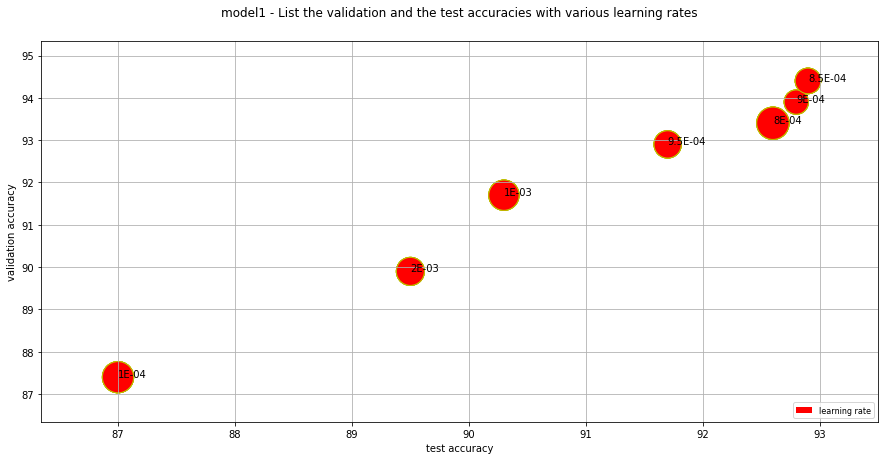

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

ltScatter, ltScat0, ltScat1, ltScat2, ltScat3, ltScat4 = [], [], [], [], [], [] 

# model1 - List the validation and the test accuracies with various learning rates
ltLog0    = ['1E-03','2E-03','9E-04','1E-04','8E-04','9.5E-04','8.5E-04']
ltAccTst0 = [90.3,89.5,92.8,87.0,92.6,91.7,92.9]
ltAccVal0 = [91.7,89.9,93.9,87.4,93.4,92.9,94.4]
ltCost0   = [0.456,0.392,0.293,0.487,0.523,0.371,0.326]
ltScat0   = [ltLog0,ltAccTst0,ltAccVal0,ltCost0,'learning rate']

ltScatter = [ltScat0] #, ltScat1, ltScat2, ltScat3, ltScat4]

showAccu(ltScatter, 'model1 - List the validation and the test accuracies with various learning rates')

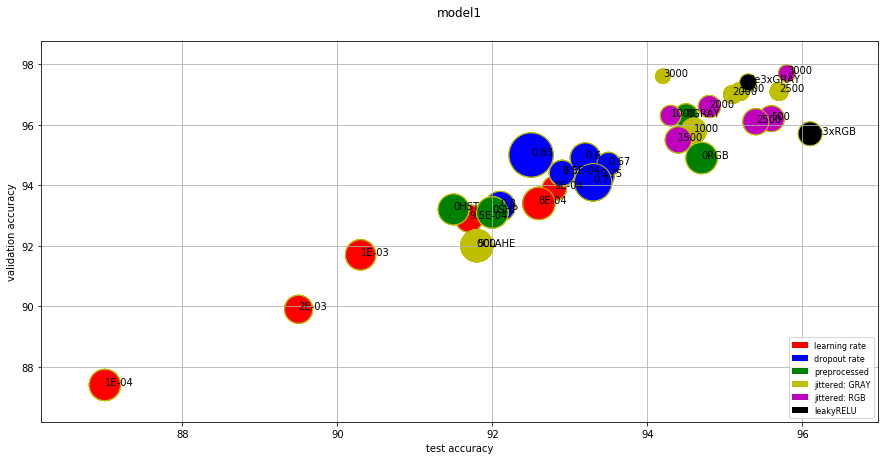

In [52]:
## Visualize both the validation and the test accuracies with various hyperparameters
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

ltScatter, ltScat0, ltScat1, ltScat2, ltScat3, ltScat4 = [], [], [], [], [], [] 

# model1 - List the validation and the test accuracies with various learning rates
ltLog0    = ['1E-03','2E-03','9E-04','1E-04','8E-04','9.5E-04','8.5E-04']
ltAccTst0 = [90.3,89.5,92.8,87.0,92.6,91.7,92.9]
ltAccVal0 = [91.7,89.9,93.9,87.4,93.4,92.9,94.4]
ltCost0   = [0.456,0.392,0.293,0.487,0.523,0.371,0.326]
ltScat0   = [ltLog0,ltAccTst0,ltAccVal0,ltCost0,'learning rate']

# model1 - List the validation and the test accuracies with various dropout rates
ltLog1    = ['0.5','0.75','0.85','0.6','0.8','0.67','0.7']
ltAccTst1 = [92.9,93.4,92.5,93.2,92.1,93.5,93.3]
ltAccVal1 = [94.4,94.3,95.0,94.9,93.3,94.7,94.1]
ltCost1   = [0.326,0.350,0.978,0.457,0.450,0.274,0.701]
ltScat1   = [ltLog1,ltAccTst1,ltAccVal1,ltCost1,'dropout rate']

# model1 - List the validation and the test accuracies with various proprocessed data
ltLog2    = ['0RGB','0GRAY','0SHP','0HST','0CLAHE']
ltAccTst2 = [94.7,94.5,92.0,91.5,91.8]
ltAccVal2 = [94.9,96.3,93.1,93.2,92.0]
cost2     = [0.492,0.279,0.493,0.473,0.511]
ltScat2   = [ltLog2,ltAccTst2,ltAccVal2,cost2,'preprocessed']

# model1 - List the validation and the test accuracies with various amount of jittered data (grayscale & centered normalized)
ltLog3    = ['500','1000','1500','2000','2500','3000']
ltAccTst3 = [ 91.8 , 94.6 , 95.2 , 95.1 , 95.7 , 94.2 ]
ltAccVal3 = [ 92.0 , 95.8 , 97.1 , 97.0 , 97.1 , 97.6 ]
cost3     = [ 0.511 , 0.312 , 0.164 , 0.163 , 0.161 , 0.103 ]
ltScat3   = [ltLog3,ltAccTst3,ltAccVal3,cost3,'jittered: GRAY']   

# model1 - List the validation and the test accuracies with various amount of jittered data (rgb & centered normalized)
ltLog4    = ['500','1000','1500','2000','2500','3000']
ltAccTst4 = [95.6,94.3,94.4,94.8,95.4,95.8]
ltAccVal4 = [96.2,96.3,95.5,96.6,96.1,97.7]
cost4     = [0.333,0.209,0.344,0.243,0.339,0.141]
ltScat4   = [ltLog4,ltAccTst4,ltAccVal4,cost4,'jittered: RGB']


# model1 - List the validation and the test accuracies with a leaky RELU and various amount of jittered data (centered normalized)
ltLog5    = ['3e3xRGB','3e3xGRAY']
ltAccTst5 = [96.1,95.3]
ltAccVal5 = [95.7,97.4]
cost5     = [0.285,0.143]
ltScat5   = [ltLog5,ltAccTst5,ltAccVal5,cost5,'leakyRELU']


ltScatter = [ltScat0, ltScat1, ltScat2, ltScat3, ltScat4, ltScat5]

showAccu(ltScatter)

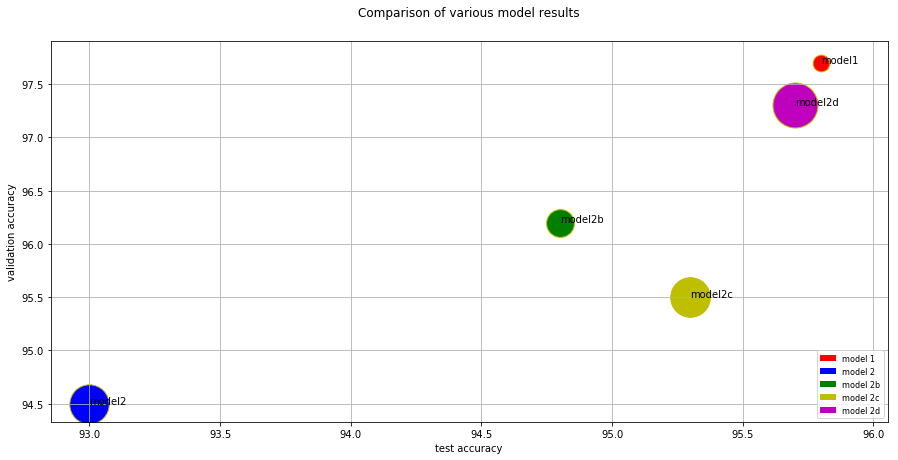

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

ltScatter, ltScat0, ltScat1, ltScat2, ltScat3, ltScat4 = [], [], [], [], [], [] 

# model1 - List the validation and the test accuracies
ltLog0    = ['model1']
ltAccTst0 = [95.8]
ltAccVal0 = [97.7]
ltCost0   = [0.141]
ltScat0   = [ltLog0,ltAccTst0,ltAccVal0,ltCost0,'model 1']

# model2 - List the validation and the test accuracies
ltLog1    = ['model2']
ltAccTst1 = [93] 
ltAccVal1 = [94.5]
ltCost1   = [0.777]
ltScat1   = [ltLog1,ltAccTst1,ltAccVal1,ltCost1,'model 2']

# model2b - List the validation and the test accuracies
ltLog2    = ['model2b']
ltAccTst2 = [94.8]
ltAccVal2 = [96.2]
cost2     = [0.386]
ltScat2   = [ltLog2,ltAccTst2,ltAccVal2,cost2,'model 2b']

# model2c - List the validation and the test accuracies
ltLog3    = ['model2c']
ltAccTst3 = [ 95.3 ]
ltAccVal3 = [ 95.5 ]
cost3     = [ 0.784 ]
ltScat3   = [ltLog3,ltAccTst3,ltAccVal3,cost3,'model 2c']   

# model2d - List the validation and the test accuracies
ltLog4    = ['model2d']
ltAccTst4 = [95.7]
ltAccVal4 = [97.3]
cost4     = [1.011]
ltScat4   = [ltLog4,ltAccTst4,ltAccVal4,cost4,'model 2d']


ltScatter = [ltScat0, ltScat1, ltScat2, ltScat3, ltScat4]

showAccu(ltScatter, 'Comparison of various model results')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1. Load and Output the Images

In [18]:
# Helper functions: Show xSize*ySize images
def showTrace2(dataImg, dataLabel, xSize=1, ySize=5):
    fig0, ax0 = plt.subplots(xSize, ySize, figsize=(15,6))
    fig0.subplots_adjust(hspace=0.2, wspace=0.1)
    ax0 = ax0.ravel()

    # Get dictionary[idClass] = tuple( index(idClass))
    dct, dct0, dct1, lt = {}, {}, {}, []
    dct0, dct1, lt = ocrLabel(dataLabel)

    for i in range(xSize*ySize): 
        image = dataImg[i].squeeze()
        
        if image.shape[-1] == 3: 
            ch = 3
            cMap='rgb'
            ax0[i].imshow(image)
        elif image.shape[-1] == 32 or image.shape[-1] == 1:
            ch = 1
            cMap='gray'
            ax0[i].imshow(image, cmap = cMap)
        else:
            raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))

        #ax0[i].imshow(image, cmap = cMap)
        title = dct0[dataLabel[i]][:17]+'.'
        ax0[i].set_title(title, fontsize=8)
        ax0[i].axis('off')

        
if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step3.2.0','showTrace2','show xSize x ySize images'))

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Own images - download, resize and store images into a list and convert it into an array
#myData  = pathData+'newData/_imgOK_/'
#myData  = pathData+'newData/_new_images_0/'
#myData  = pathData+'newData/_new_images_1/'
#myData  = pathData+'newData/_new_images_3/'
myData  = pathData+'newData/_ownData_/_serie01_/'
#myData  = pathData+'newData/_ownData_/_serie02_/'
#myData  = pathData+'newData/_ownData_/_serie03_/'

In [20]:
import glob
import matplotlib.image as mpimg
from PIL import Image

myImage, myLabel = [], []

for i, myImg in enumerate(glob.glob(myData+'*.png')):
    myLabel.append(int(myImg[len(myData):len(myData)+2]))       # int(myImg[0:1]))  # -6:-4]))
    image = cv2.imread(myImg)
    image = cv2.resize(image,(32,32),interpolation = cv2.INTER_CUBIC)
    myImage.append(image)

myImage = np.asarray(myImage)
print('< myLabel > = {}'.format(myLabel))

< myLabel > = [0, 1, 2, 32, 35]


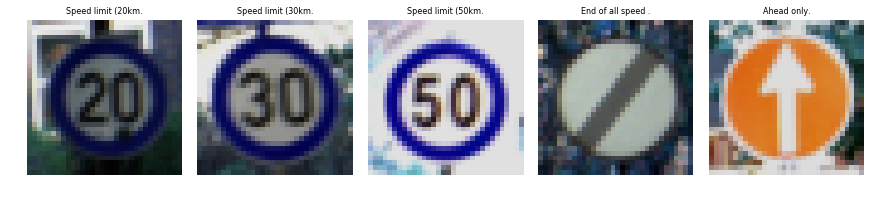

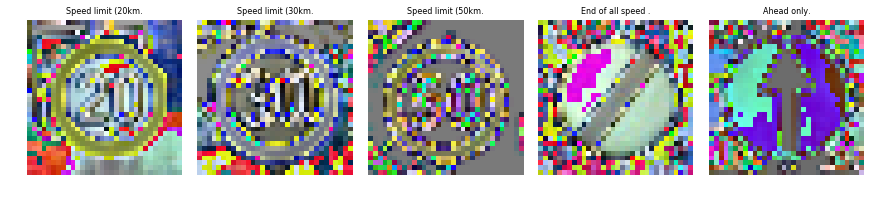

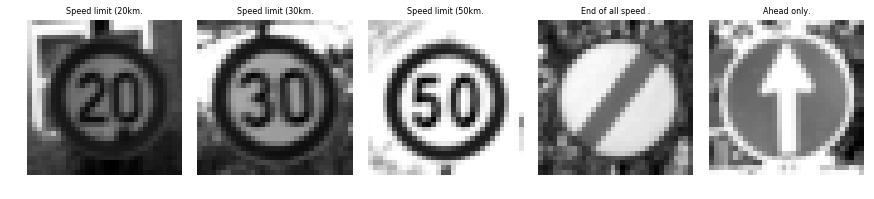

In [21]:
# Own images - display original images
showTrace2(myImage, myLabel,xSize=1, ySize=5)

# Own images - Standarize, normalize and display RGB data
myImg1 = (myImage - np.mean(myImage))/np.std(myImage)
showTrace2(myImg1,myLabel,xSize=1, ySize=5)

# Own images - Standarize, normalize and display grayscale data
myImg2 = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in myImage ])
myImg2 = (myImg2 - np.mean(myImg2))/np.std(myImg2)
myImg2 = myImg2[..., newaxis]
showTrace2(myImg2,myLabel,xSize=1, ySize=5)

### 3.2. Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

> #### 3.2.0. Helper function

In [22]:
# Prediction function ---------------------------------------------------------
def fctPrediction(myImg, pathCkp, tRace=tRace1, msg=msg1):
    ckptMeta = 'model1.ckpt.meta'
    if tRace:print(msg,' | [{:5}] {}: {}'.format('fctPrediction','<ckptMeta>',ckptMeta))
    
    image = myImg[0].squeeze()
    if image.shape[-1] == 3:  
        Ckp  = pathLog+pathCkp[0]+'/'  # with RGB images
        cMap ='rgb'
        ch   = 3      
        #if tRace:print(msg,' | [{:5}] {}: {}'.format('step3.2.1','<RGB>',pathCkp1[len(pathLog):-1]))
    elif image.shape[-1] == 32 or image.shape[-1] == 1:
        Ckp  = pathLog+pathCkp[1]+'/' # with GRAYSCALE images
        cMap ='gray'
        ch   = 1
        #if tRace:print(msg,' | [{:5}] {}: {}'.format('step3.2.1','<GRAY>',pathCkp2[len(pathLog):-1]))
    else:
        raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))

    # Build the graph
    graph = tf.Graph()
    with graph.as_default():
        x = tf.placeholder(tf.float32, shape = (None, 32, 32, ch))
        y = tf.placeholder(tf.uint8, shape = (None), name='label')
        keep_prob = tf.placeholder(tf.float32)
        logits, embedding_input, embedding_size = modArc.model1(x,ch,0,0.1,keep_prob)
        
    # Prediction
    with tf.Session(graph = graph) as sess:
        sess.run(tf.global_variables_initializer())
        metaModel = tf.train.import_meta_graph(Ckp+ckptMeta)
        metaModel.restore(sess, tf.train.latest_checkpoint(Ckp))
        myInference = tf.argmax(logits, 1) #tf.nn.softmax(
        myPrediction = sess.run(myInference, feed_dict={ x: myImg, keep_prob: 1 })

    showTrace2(myImg, myPrediction,1,5)
    if tRace:print(msg,' | [{:5}] {}: {}{}{}'.format('step3.2.1','','prediction with',cMap,' images done'))

    return myPrediction, ch

if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step3.2.0','fctPrediction','model 1, standarized and normalized data'))

> #### 3.2.1. Prediction with centered, normalized and jittered images

In [23]:
pathCkp = ['171023x1030_F3000RGB_R85e-5_D67','170704x0014_F3000GRAY_R85e-5_D67']

In [ ]:
myPredictionRGB, ch = fctPrediction(myImg1, pathCkp)
print(('<myPrediction> : {}').format(myPredictionRGB))

INFO:tensorflow:Restoring parameters from C:/Users/mo/home/_eSDC_/_02_WIP/_170515-2125_Backup_/_Coding_/logs/nn_logs/170704x0014_F3000GRAY_R85e-5_D67/model1.ckpt
<myPrediction> : [11 11  6 11 18]


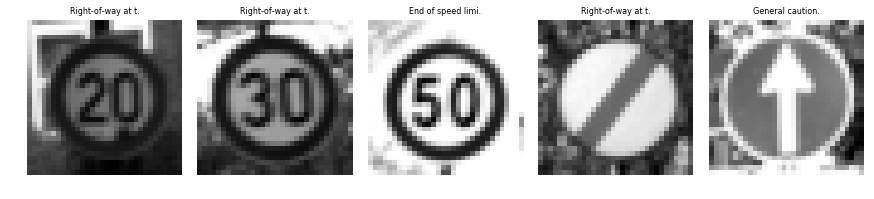

In [24]:
myPredictionGRAY, ch = fctPrediction(myImg2, pathCkp)
print(('<myPrediction> : {}').format(myPredictionGRAY))

> #### 3.2.2. Calculation of the accuracy for my own new images

In [25]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
def calAccu(myLabel,myPrediction):
    a1 = [1 if c else 0 for c in [ i1 == i2 for (i1,i2)   in zip(myLabel, myPrediction)] ]
    try:
        return (sum(a1)/len(a1))* 100 # print('score = {0:.0f}%'.format((sum(a1)/len(a1))* 100))
    except ZeroDivisionError:
        print("Can't divide by zero")

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
tRace1 = True

if ch == 3: 
    if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step3.2.1','<RGB>',pathCkp[0]))
    myPrediction = myPredictionRGB[:]
else: 
    if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step3.2.1','<GRAY>',pathCkp[1]))
    myPrediction = myPredictionGRAY[:]

print('')
myAccu = calAccu(myLabel,myPrediction)
print('myAccu = {0:.0f}%'.format(myAccu))

tRace1 = False

.LOADED 171103x1713  | [step3.2.1] <GRAY>: 170704x0014_F3000GRAY_R85e-5_D67

myAccu = 0%


### 3.3. Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
def chMap(image):
    if image.shape[-1] == 3:
        cMap ='rgb'
        ch   = 3
    elif image.shape[-1] == 32 or image.shape[-1] == 1:
        cMap ='gray'
        ch   = 1
    else:
        raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))

    return cMap, ch

In [28]:
def topKPrediction(myImg, pathCkp, k = 5, tRace=tRace1, msg=msg1):
    ckptMeta = 'model1.ckpt.meta'
    if tRace:print(msg,' | [{:5}] {}: {}'.format('fctPrediction','<ckptMeta>',ckptMeta))
        
    image = myImg[0].squeeze()
    if image.shape[-1] == 3:  
        Ckp  = pathLog+pathCkp[0]+'/'  # with RGB images
        cMap ='rgb'
        ch   = 3      
        if tRace:print(msg,' | [{:5}] {}: {}'.format('step3.2.1','<RGB>',Ckp[len(pathLog):-1]))
    elif image.shape[-1] == 32 or image.shape[-1] == 1:
        Ckp  = pathLog+pathCkp[1]+'/' # with GRAYSCALE images
        cMap ='gray'
        ch   = 1
        if tRace:print(msg,' | [{:5}] {}: {}'.format('step3.2.1','<GRAY>',Ckp[len(pathLog):-1]))
    else:
        raise ValueError('[ERROR] info | channel : {}, Current image.shape: {}'.format(ch,image.shape))

    # Build the graph
    graph = tf.Graph()
    with graph.as_default():
        x = tf.placeholder(tf.float32, shape = (None, 32, 32, ch))
        y = tf.placeholder(tf.uint8, shape = (None), name='label')
        keep_prob = tf.placeholder(tf.float32)
        logits, embedding_input, embedding_size = modArc.model1(x,ch,0,0.1,keep_prob)
        tK0 = tf.nn.top_k(tf.nn.softmax(logits), k)
        
    # Prediction
    with tf.Session(graph = graph) as sess:
        sess.run(tf.global_variables_initializer())
        metaModel = tf.train.import_meta_graph(Ckp+ckptMeta)
        metaModel.restore(sess, tf.train.latest_checkpoint(Ckp))
        tK1 = sess.run(tK0, feed_dict={ x: myImg, keep_prob: 1 })
        
        return tK1

In [29]:
ch = int(input('< RGB > images : 3 OR < GRAY > images : 1 = '))
if ch == 3:
    tK = topKPrediction(myImg1, pathCkp, 43)
else:
    tK = topKPrediction(myImg2, pathCkp, 43)


< RGB > images : 3 OR < GRAY > images : 1 = 1
INFO:tensorflow:Restoring parameters from C:/Users/mo/home/_eSDC_/_02_WIP/_170515-2125_Backup_/_Coding_/logs/nn_logs/170704x0014_F3000GRAY_R85e-5_D67/model1.ckpt


In [34]:
print('Top k Softmax Probabilities : {}'.format(tK))

Top k Softmax Probabilities : TopKV2(values=array([[ 0.08106857,  0.04510733,  0.03263213,  0.0316751 ,  0.03131647,
         0.03112457,  0.03080131,  0.0301514 ,  0.02978288,  0.02896718,
         0.02594122,  0.0250449 ,  0.02461755,  0.02453287,  0.0237984 ,
         0.02331868,  0.02319209,  0.0231162 ,  0.0222812 ,  0.02208918,
         0.02165016,  0.02098456,  0.02049307,  0.02017451,  0.0196973 ,
         0.0194636 ,  0.01907274,  0.01859589,  0.01843638,  0.01819739,
         0.01796105,  0.01774831,  0.0173125 ,  0.01708513,  0.01570729,
         0.01555514,  0.0147188 ,  0.01454803,  0.01437895,  0.01414558,
         0.01170391,  0.01123549,  0.01057491],
       [ 0.09129253,  0.03501146,  0.03296491,  0.03195581,  0.03193555,
         0.03131393,  0.03052632,  0.03047729,  0.03001241,  0.02952135,
         0.02913307,  0.02805175,  0.02755471,  0.02459453,  0.02422263,
         0.02402548,  0.02318205,  0.02218859,  0.02198941,  0.02104179,
         0.02071173,  0.02057935

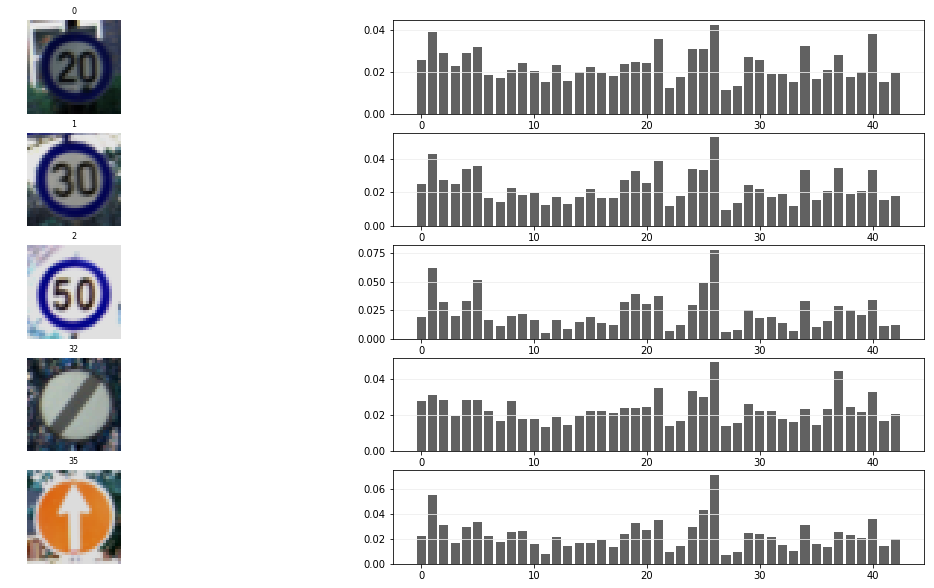

In [30]:
fig, ax0 = plt.subplots(5, 2, figsize=(20, 10))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
ax0 = ax0.ravel()
for i, classId, value, image, label in zip(range(0,10,2), tK.indices, tK.values, myImage, myLabel):
    ax0[i].set_title(label, fontsize=8)
    ax0[i].axis('off')    
    ax0[i].imshow(image)
    ax0[i+1].yaxis.grid(color='#eeeeee')
    ax0[i+1].bar(classId, value, color='#616161')

In [3]:
# Helper functions: Show xSize*ySize images
def showTrace3(dataImg, dataLabel, myImg, myLabel, top_K ,xSize=5, ySize=7):
    fig0, ax0 = plt.subplots(xSize, ySize, figsize=(15,6))
    fig0.subplots_adjust(hspace=0.2, wspace=0.1)
    ax0 = ax0.ravel()
    
    dct = indexClass(dataLabel)
    c0, c1   = 0, 0
    img0 = np.zeros([32,32,3],dtype=np.uint8)
    img0.fill(255)
    
    for i in range(xSize*ySize):
        if i in range(0,xSize*ySize,ySize):
            # myImg
            image = myImg[c0].squeeze()
            title = myLabel[c0]
            ax0[i].set_title(title, fontsize=8)
            c0 += 1
        elif i in range(1,xSize*ySize,ySize):
            # blank
            image = img0[:]
            title= '' 
            ax0[i].set_title(title, fontsize=8)
        else:
            # dataImg
            idCls = top_K.indices[c0-1][c1%(ySize-2)]
            title = top_K.values[c0-1][c1%(ySize-2)]*100
            title = title.astype(int)
            ax0[i].set_title(str(idCls)+':'+str(title)+'%', fontsize=8)
            c1 += 1
            index = random.randint(dct[idCls][0], dct[idCls][-1])
            image = dataImg[index].squeeze()
        
        cMap, ch = chMap(image)
        
        if ch == 3:
            ax0[i].imshow(image)
        else:
            ax0[i].imshow(image, cmap = cMap)
        ax0[i].axis('off')   
        
if tRace1:print(msg1,' | [{:5}] {}: {}'.format('step1','showTrace','show xSize x ySize images'))

In [ ]:
showTrace3(X_train, y_train, myImg1, myLabel, tK)

In [ ]:
showTrace3(X_train, y_train, myImg2, myLabel, tK ,xSize=5, ySize=35)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")